In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

### **Load Data**

In [2]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
# Get the column names of the three dataframes
cols_customers = df_customers.columns
cols_loans = df_loans.columns
cols_bureau = df_bureau.columns

# Find the common columns
common_cols = list(set(cols_customers) & set(cols_loans) & set(cols_bureau))

print("Common columns:", common_cols)

Common columns: ['cust_id']


In [5]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

   ... loan_amount  processing_fee     gst net_disbursement  \
0  ...     2467000        49340.00  444060          1973600   
1  ...     3883000        77660.00  698940          3106400   
2  ...     2170000        43400.00  390600          1736000   

  loan_tenure_months  principal_outstanding  bank_balance_at_application  \
0                 33                1630408                       873386   
1                 30                 709309                       464100   
2                 21                1562399                      1476042   

   disbursal_date  installment_start_dt  default  
0      2019-07-24            2019-08-10    False  
1      2019-07-24            2019-08-15    False  
2      2019-07-24            2019-08-21    False  

[3 rows x 26 columns]

In [6]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head(3)

cust_id  age gender marital_status employment_status   income  \
0  C00001   44      M        Married     Self-Employed  2586000   
1  C00002   38      M        Married          Salaried  1206000   
2  C00003   46      F        Married     Self-Employed  2878000   

   number_of_dependants residence_type  years_at_current_address     city  \
0                     3          Owned                        27    Delhi   
1                     3          Owned                         4  Chennai   
2                     3          Owned                        24  Kolkata   

   ... disbursal_date  installment_start_dt default number_of_open_accounts  \
0  ...     2019-07-24            2019-08-10   False                       1   
1  ...     2019-07-24            2019-08-15   False                       3   
2  ...     2019-07-24            2019-08-21   False                       2   

  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  \
0                         1                 42                  0          0   
1                         1                 96                 12         60   
2                         1                 82                 24        147   

   enquiry_count  credit_utilization_ratio  
0              3                         7  
1              5                         4  
2              6                        58  

[3 rows x 33 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

Converting 'default' column tyoe from bool to int

In [8]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

default is a target variable and we can see some class imbalance here.

### **Train Test Split**
We perform train test split before doing EDA to prevent data leakage. We don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering.

In [9]:
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head()

cust_id  age gender marital_status employment_status    income  \
12746  C12747   59      M        Married     Self-Employed  11327000   
32495  C32496   44      F         Single          Salaried    715000   
43675  C43676   38      M         Single          Salaried   3195000   
9040   C09041   42      M        Married          Salaried   1500000   
13077  C13078   58      M        Married     Self-Employed   1817000   

       number_of_dependants residence_type  years_at_current_address  \
12746                     3          Owned                        30   
32495                     0          Owned                        27   
43675                     0       Mortgage                        26   
9040                      2       Mortgage                        30   
13077                     4          Owned                        29   

            city  ... disbursal_date  installment_start_dt  \
12746  Hyderabad  ...     2020-10-31            2020-11-11   
32495     Mumbai  ...     2022-10-22            2022-10-27   
43675    Chennai  ...     2023-12-04            2023-12-29   
9040   Bangalore  ...     2020-06-18            2020-07-07   
13077       Pune  ...     2020-11-12            2020-12-07   

      number_of_open_accounts number_of_closed_accounts total_loan_months  \
12746                       4                         2               152   
32495                       3                         1               160   
43675                       1                         1                54   
9040                        3                         0                76   
13077                       1                         2                60   

       delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  \
12746                 20        118              4                        36   
32495                 10         62              5                         5   
43675                 12         67              4                         0   
9040                   0          0              8                        87   
13077                  0          0              1                        71   

       default  
12746        0  
32495        0  
43675        0  
9040         0  
13077        0  

[5 rows x 33 columns]

### **Data Cleaning**

In [10]:
df_train.shape

(37500, 33)

In [11]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
default                         0
dtype: int64

In [12]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [13]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [14]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

df_train.residence_type.unique(), df_test.residence_type.unique()

<ipython-input-14-1aae0caf44bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
<ipython-input-14-1aae0caf44bf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [15]:
df_train.duplicated().sum()

0

In [16]:
df_train.describe()

age      income  number_of_dependants  years_at_current_address  \
count 37500.00    37500.00              37500.00                  37500.00   
mean     39.54  2633326.16                  1.94                     16.00   
std       9.86  2623780.52                  1.54                      8.92   
min      18.00        0.00                  0.00                      1.00   
25%      33.00   802000.00                  0.00                      8.00   
50%      39.00  1885000.00                  2.00                     16.00   
75%      46.00  3326250.00                  3.00                     24.00   
max      70.00 11999000.00                  5.00                     31.00   

        zipcode  sanction_amount  loan_amount  processing_fee        gst  \
count  37500.00         37500.00     37500.00        37500.00   37500.00   
mean  418866.25       4699691.57   3996067.73        80290.68  719292.19   
std   169035.02       6257832.98   5371862.29       113128.14  966935.21   
min   110001.00             0.00         0.00            0.00       0.00   
25%   302001.00       1142000.00    961000.00        19220.00  172980.00   
50%   400001.00       2644000.00   2230000.00        44600.00  401400.00   
75%   560001.00       5178000.00   4619000.00        92420.00  831420.00   
max   700001.00      52175000.00  47819000.00      5293543.52 8607420.00   

       net_disbursement  ...  principal_outstanding  \
count          37500.00  ...               37500.00   
mean         3196854.19  ...             1333819.51   
std          4297489.83  ...             1213674.44   
min                0.00  ...                  -1.00   
25%           768800.00  ...              422197.50   
50%          1784000.00  ...              997427.50   
75%          3695200.00  ...             1784879.00   
max         38255200.00  ...             5000000.00   

       bank_balance_at_application  number_of_open_accounts  \
count                     37500.00                 37500.00   
mean                     986298.87                     2.50   
std                     1043145.01                     1.12   
min                           0.00                     1.00   
25%                      287040.25                     1.00   
50%                      665014.50                     3.00   
75%                     1234062.75                     4.00   
max                     7846643.00                     4.00   

       number_of_closed_accounts  total_loan_months  delinquent_months  \
count                   37500.00           37500.00           37500.00   
mean                        1.00              76.11               4.84   
std                         0.81              43.77               5.84   
min                         0.00               1.00               0.00   
25%                         0.00              42.00               0.00   
50%                         1.00              71.00               3.00   
75%                         2.00             107.00               8.00   
max                         2.00             223.00              24.00   

       total_dpd  enquiry_count  credit_utilization_ratio  default  
count   37500.00       37500.00                  37500.00 37500.00  
mean       26.67           5.01                     43.42     0.09  
std        32.78           2.03                     29.39     0.28  
min         0.00           1.00                      0.00     0.00  
25%         0.00           4.00                     18.00     0.00  
50%        13.00           5.00                     39.00     0.00  
75%        46.00           6.00                     67.00     0.00  
max       171.00           9.00                     99.00     1.00  

[8 rows x 21 columns]

In [17]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [18]:
#Get categorical columns
columns_categorical = df_train.select_dtypes(include="object").columns
columns_categorical

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [19]:
#Get continuous columns
columns_continuous = df_train.select_dtypes(exclude="object").columns
columns_continuous

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

### **Box plot to visualize outliers**

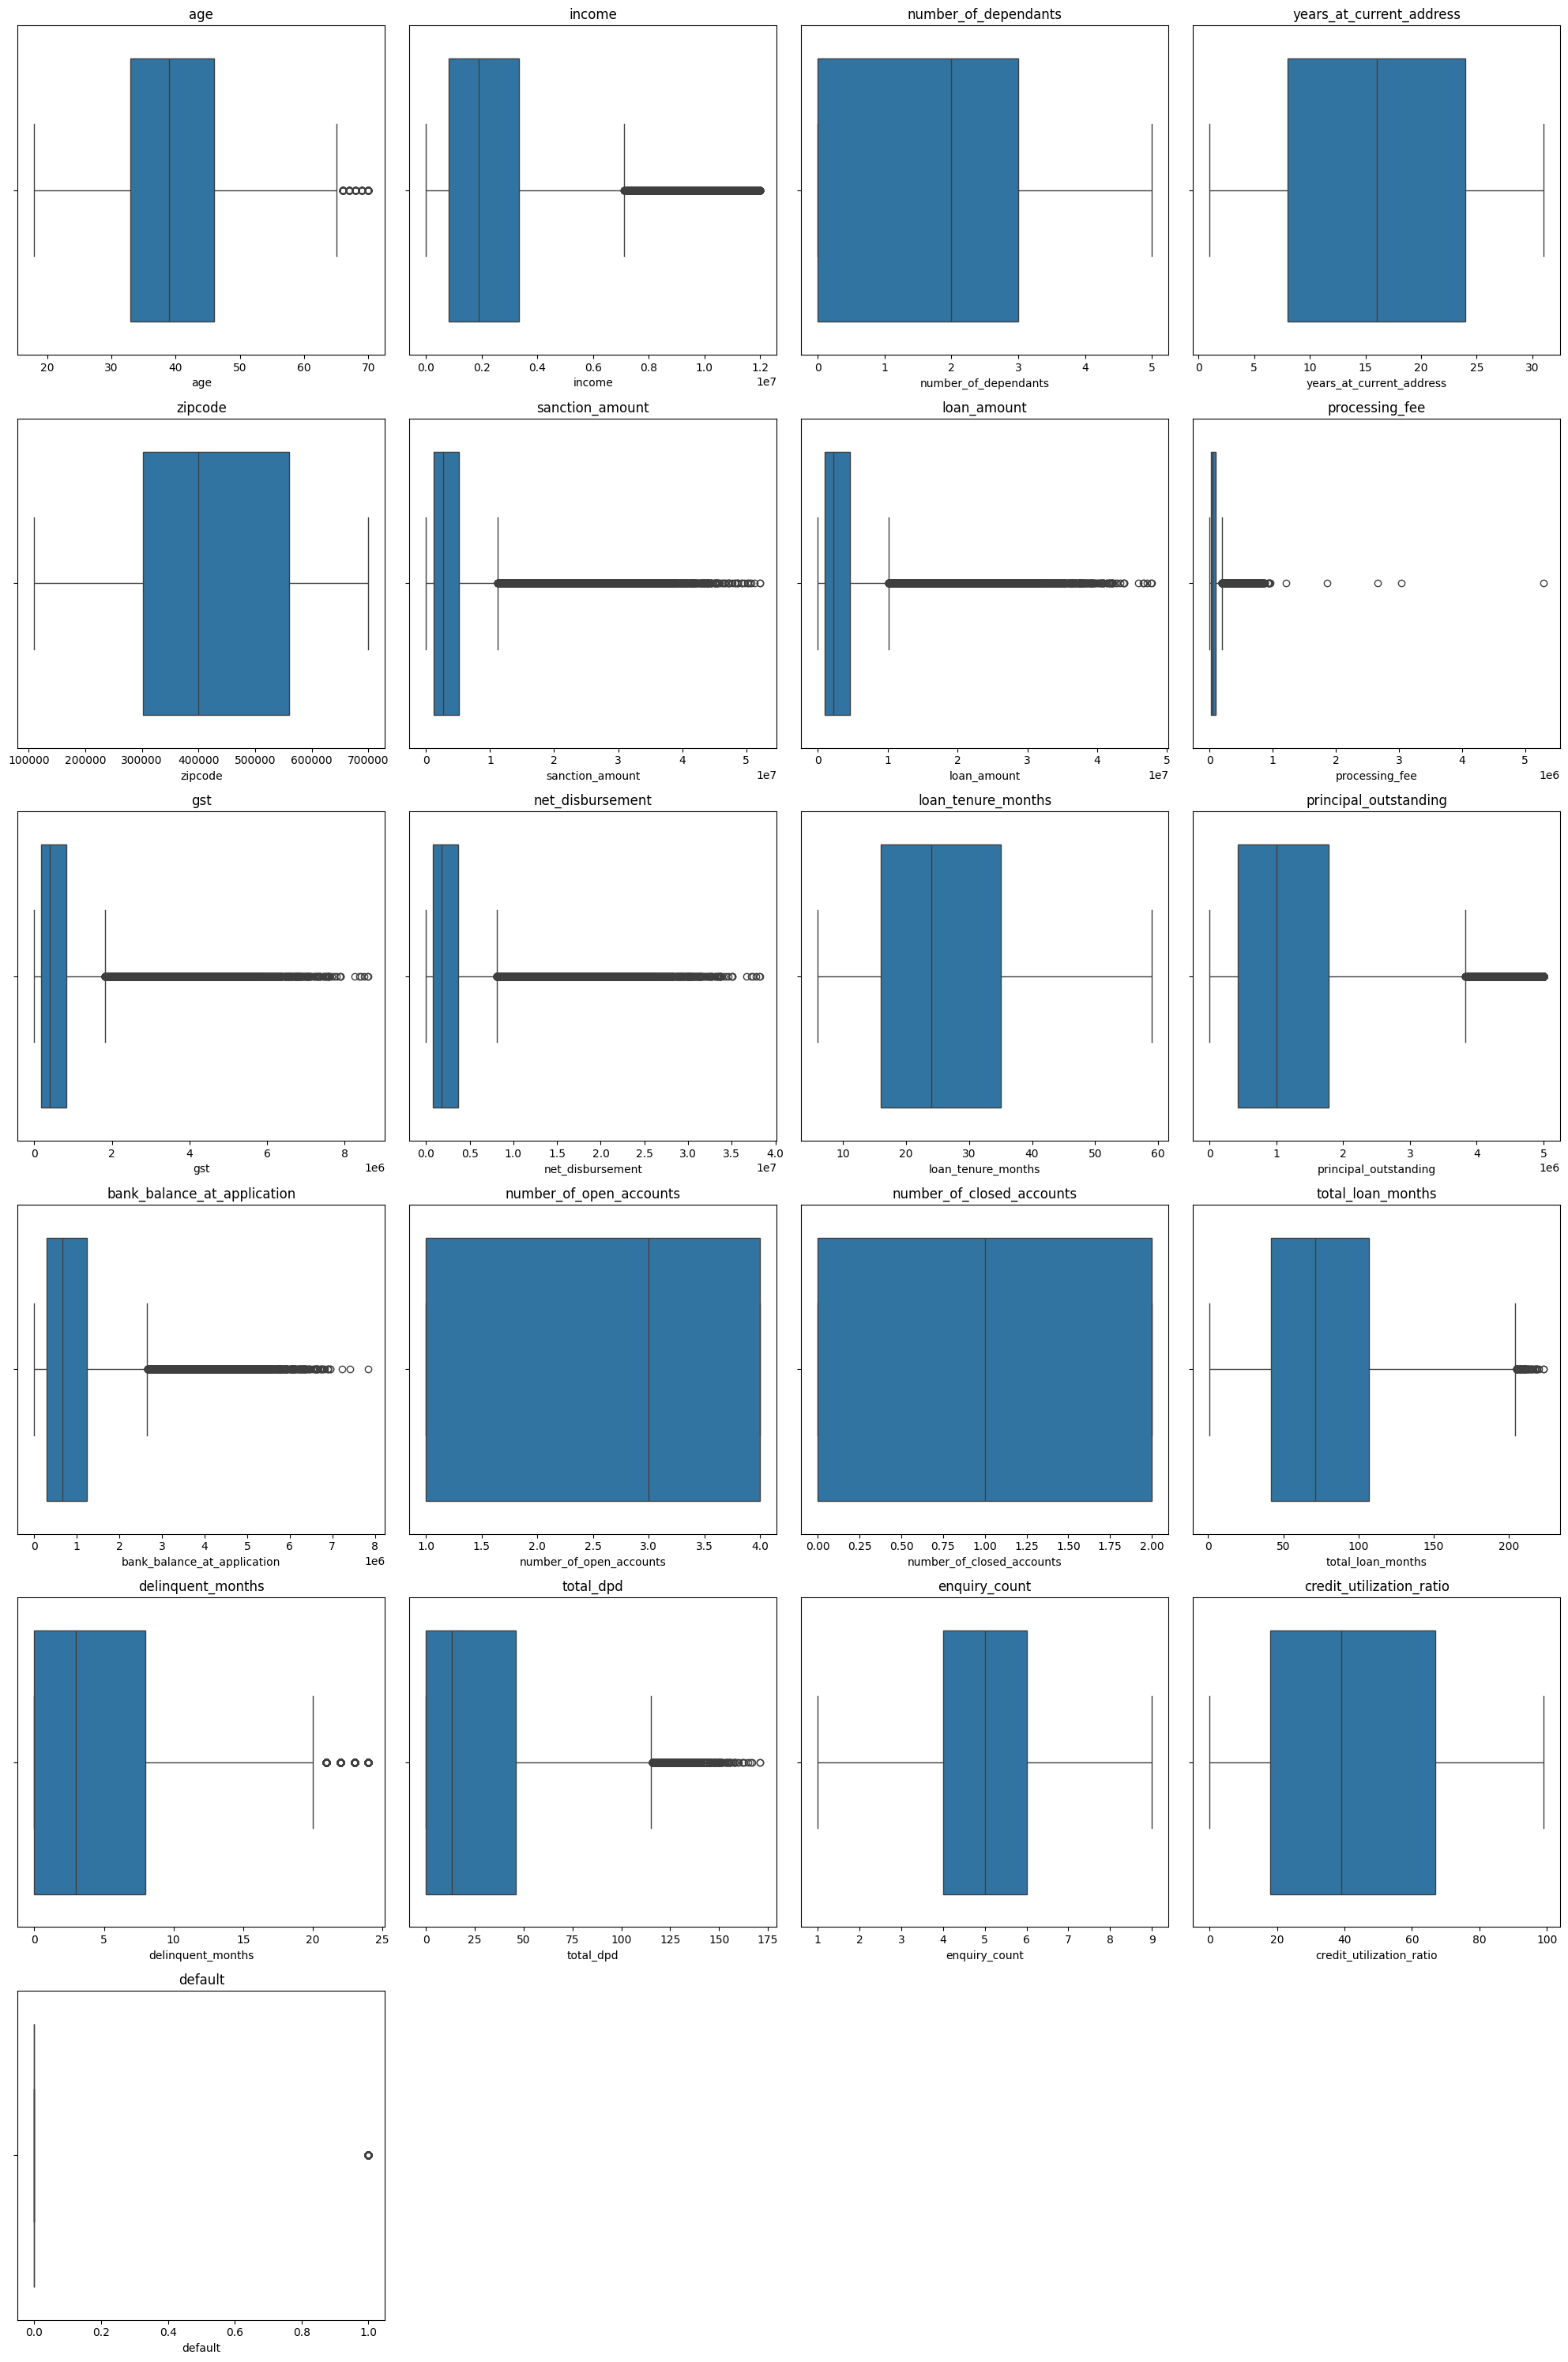

In [20]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Not all circles are outliers. A person can live till 70 years and that cannot be considered as an outlier

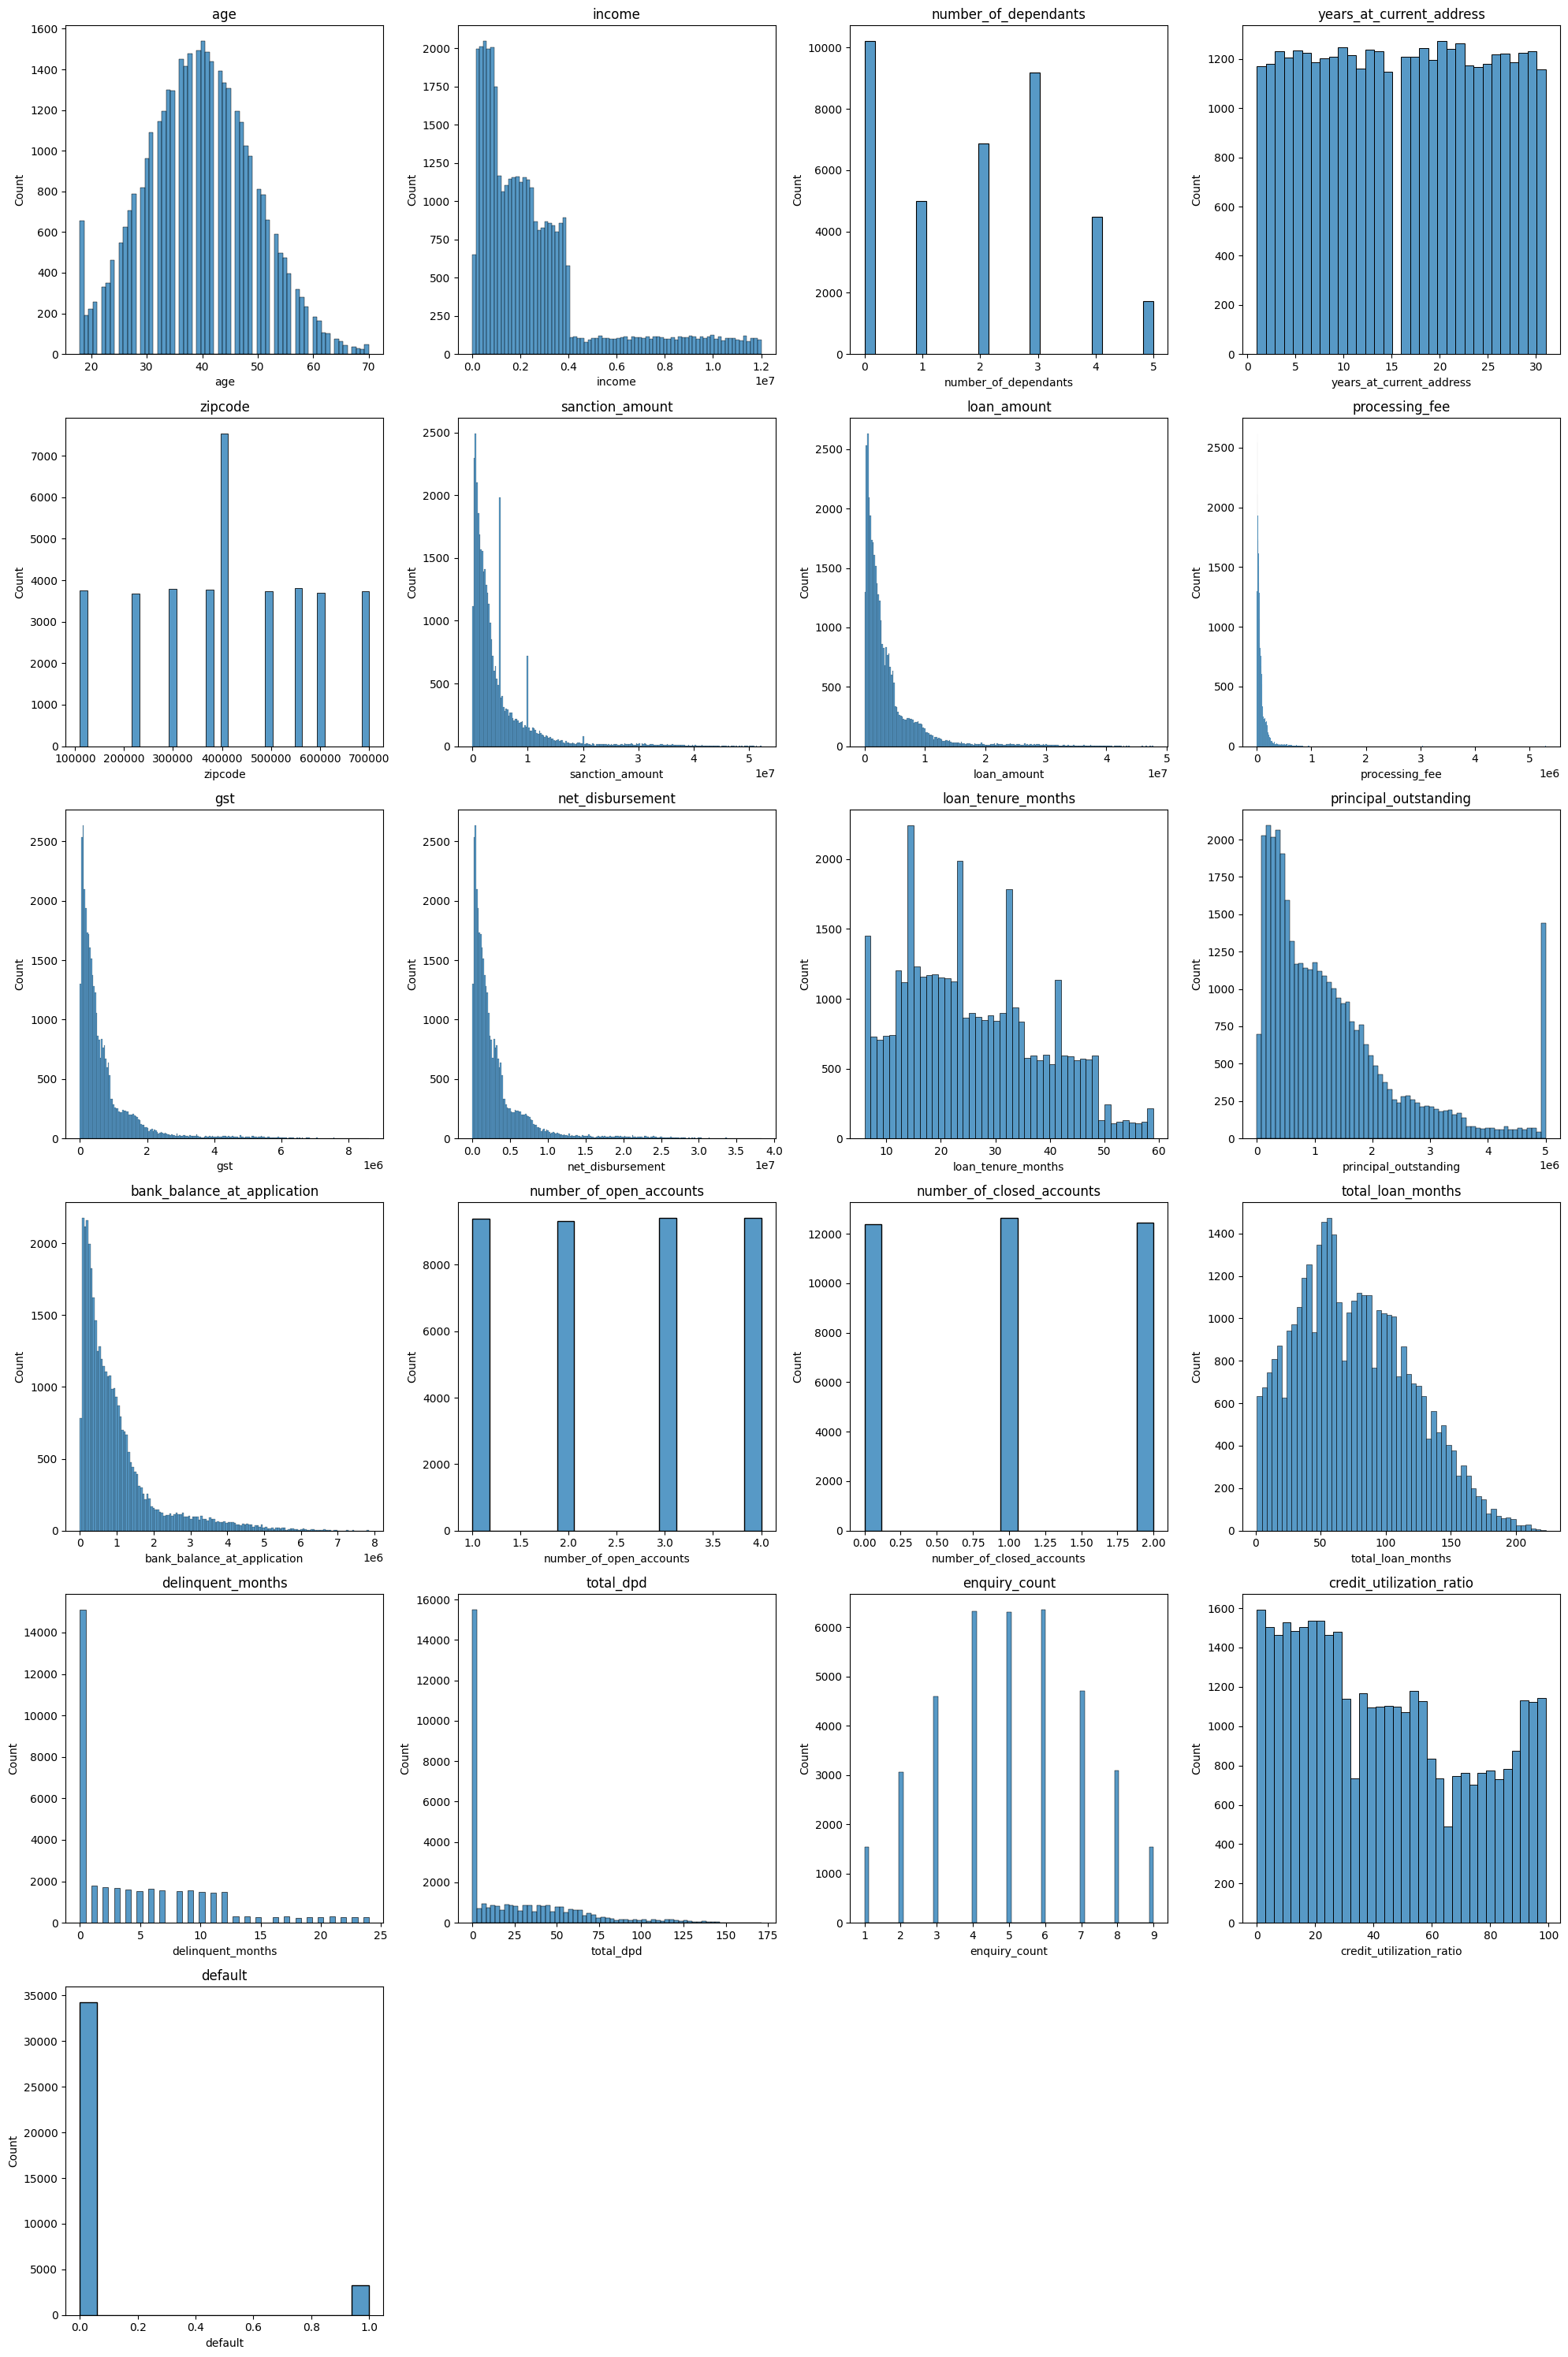

In [21]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Income column is usually right skewed. processing_fee, gst and few other columns are very much skewed. They are very much skewed in one direction, which means there might be some problem.

### **Outlier Removal: Processing Fee**

In [22]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [23]:
df_train[(df_train.processing_fee==df_train.processing_fee.max())]

cust_id  age gender marital_status employment_status   income  \
9898  C09899   56      M        Married     Self-Employed  8948000   

      number_of_dependants residence_type  years_at_current_address  \
9898                     5          Owned                        16   

           city  ... disbursal_date  installment_start_dt  \
9898  Ahmedabad  ...     2020-07-19            2020-08-11   

     number_of_open_accounts number_of_closed_accounts total_loan_months  \
9898                       2                         1                51   

      delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  \
9898                  1          5              3                        92   

      default  
9898        0  

[1 rows x 33 columns]

Let us see the loan amount fow which the processing fee is 5293543.52


In [24]:
df_train[(df_train.processing_fee==df_train.processing_fee.max())][["loan_amount","processing_fee"]]

loan_amount  processing_fee
9898      3626000      5293543.52

It is not possible to have a loan_amount of 36 Lakhs but a processing fee of 52 Lakhs. It is clearly a problem.

Processing fee is always less than loan amount.

In [25]:
# Get all the columns where processing fee is greater that laon amount
df_train[(df_train.processing_fee>df_train.loan_amount)][["loan_amount","processing_fee"]]

loan_amount  processing_fee
23981      2234000      2669791.02
28174       966000      1214492.67
47089      1738000      1858964.77
29305      2616000      3036378.01
9898       3626000      5293543.52

These are clearly outliers.

Talk to business stake holders. Here I am assuming that the processing_fee usually 3% of the the loan amount.

In [26]:
df_train[(df_train.processing_fee/df_train.loan_amount>0.03)][["loan_amount","processing_fee"]]

loan_amount  processing_fee
23981      2234000      2669791.02
28174       966000      1214492.67
47089      1738000      1858964.77
29305      2616000      3036378.01
9898       3626000      5293543.52

There are only 5 records. They can be ignored. But here the processing_fee can also be replaced with 3% * loan_amount instead of ignoring those records.

In [27]:
# Replace processing_fee for the above records with 3% * loan_amount value
df_train.loc[(df_train.processing_fee/df_train.loan_amount>0.03), "processing_fee"] = df_train.loan_amount * 0.03

In [28]:
df_train[(df_train.processing_fee/df_train.loan_amount>0.03)][["loan_amount","processing_fee"]]

Empty DataFrame
Columns: [loan_amount, processing_fee]
Index: []

In [29]:
# Apply same step on test set
df_test.loc[(df_test.processing_fee/df_test.loan_amount>0.03), "processing_fee"] = df_test.loan_amount * 0.03

In [30]:
df_test.loc[(df_test.processing_fee/df_test.loan_amount>0.03)]

Empty DataFrame
Columns: [cust_id, age, gender, marital_status, employment_status, income, number_of_dependants, residence_type, years_at_current_address, city, state, zipcode, loan_id, loan_purpose, loan_type, sanction_amount, loan_amount, processing_fee, gst, net_disbursement, loan_tenure_months, principal_outstanding, bank_balance_at_application, disbursal_date, installment_start_dt, number_of_open_accounts, number_of_closed_accounts, total_loan_months, delinquent_months, total_dpd, enquiry_count, credit_utilization_ratio, default]
Index: []

[0 rows x 33 columns]

In [31]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%
df_train[(df_train.gst>df_train.loan_amount*0.2)][["loan_amount","gst"]]

Empty DataFrame
Columns: [loan_amount, gst]
Index: []

In [32]:
# Rule 2: Net disbursement should not be higher than loan_amount (sanctioned amount > loan_amount)
df_train[df_train.net_disbursement>df_train.loan_amount].shape

(0, 33)

No rows found that breaks rule 1 and rule 2

### **Analyze Categorical Columns**

In [33]:
columns_categorical

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [34]:
for col in columns_categorical:
    print(col, "-->", df_train[col].unique())

cust_id --> ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_id --> ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt --> ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']


loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']. This has to be fixed.

In [35]:
# Fix Errors in Loan Purpose Column
df_train.loan_purpose.replace("Personaal", "Personal", inplace=True)
df_test.loan_purpose.replace("Personaal", "Personal", inplace=True)
df_train['loan_purpose'].unique(), df_test['loan_purpose'].unique()

<ipython-input-35-7b2a4dba6ee0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.loan_purpose.replace("Personaal", "Personal", inplace=True)
<ipython-input-35-7b2a4dba6ee0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

(array(['Home', 'Education', 'Personal', 'Auto'], dtype=object),
 array(['Home', 'Education', 'Auto', 'Personal'], dtype=object))

### **Exploratory Data Analysis**

#### Age column

In [36]:
columns_continuous

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [37]:
df_train.groupby("default")['age'].describe()

count  mean  std   min   25%   50%   75%   max
default                                                  
0       34277.00 39.77 9.88 18.00 33.00 40.00 46.00 70.00
1        3223.00 37.12 9.29 18.00 31.00 37.00 44.00 70.00

<Axes: xlabel='age', ylabel='Density'>

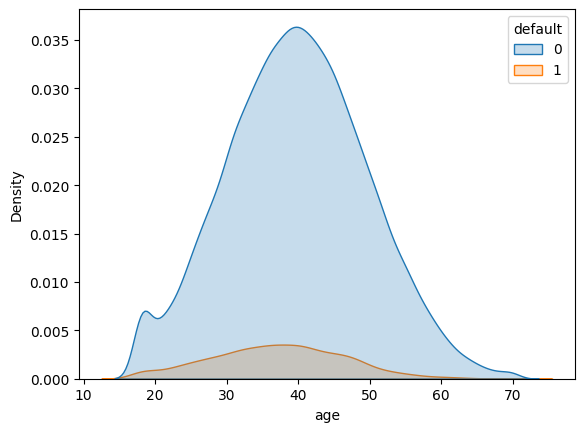

In [38]:
#Bivariate analysis for default, plot kde plot
sns.kdeplot(data=df_train, x="age", hue="default", fill=True) #KDE is a smooth curve for histogram

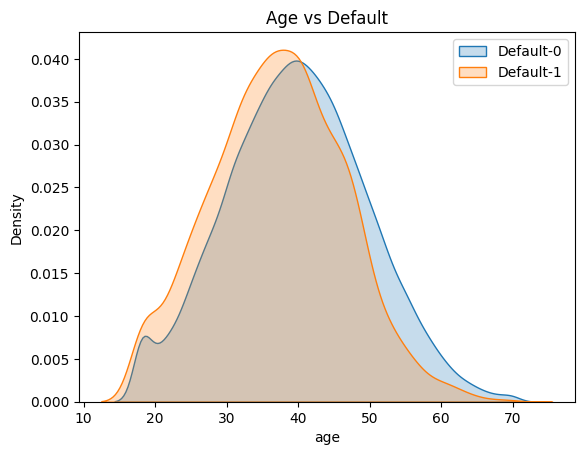

In [39]:
#KDE plot for age who have defaulted and not defaulted
sns.kdeplot(data=df_train[df_train["default"]==0], x="age", fill=True, label="Default-0")
sns.kdeplot(data=df_train[df_train["default"]==1], x="age", fill=True, label="Default-1")
plt.title("Age vs Default")
plt.legend()
plt.show()

**Insights**

* Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

<ipython-input-40-5fc7591625c7>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[col][df_train['default']==0], fill=True, label='default=0')
<ipython-input-40-5fc7591625c7>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[col][df_train['default']==1], fill=True, label='default=1')


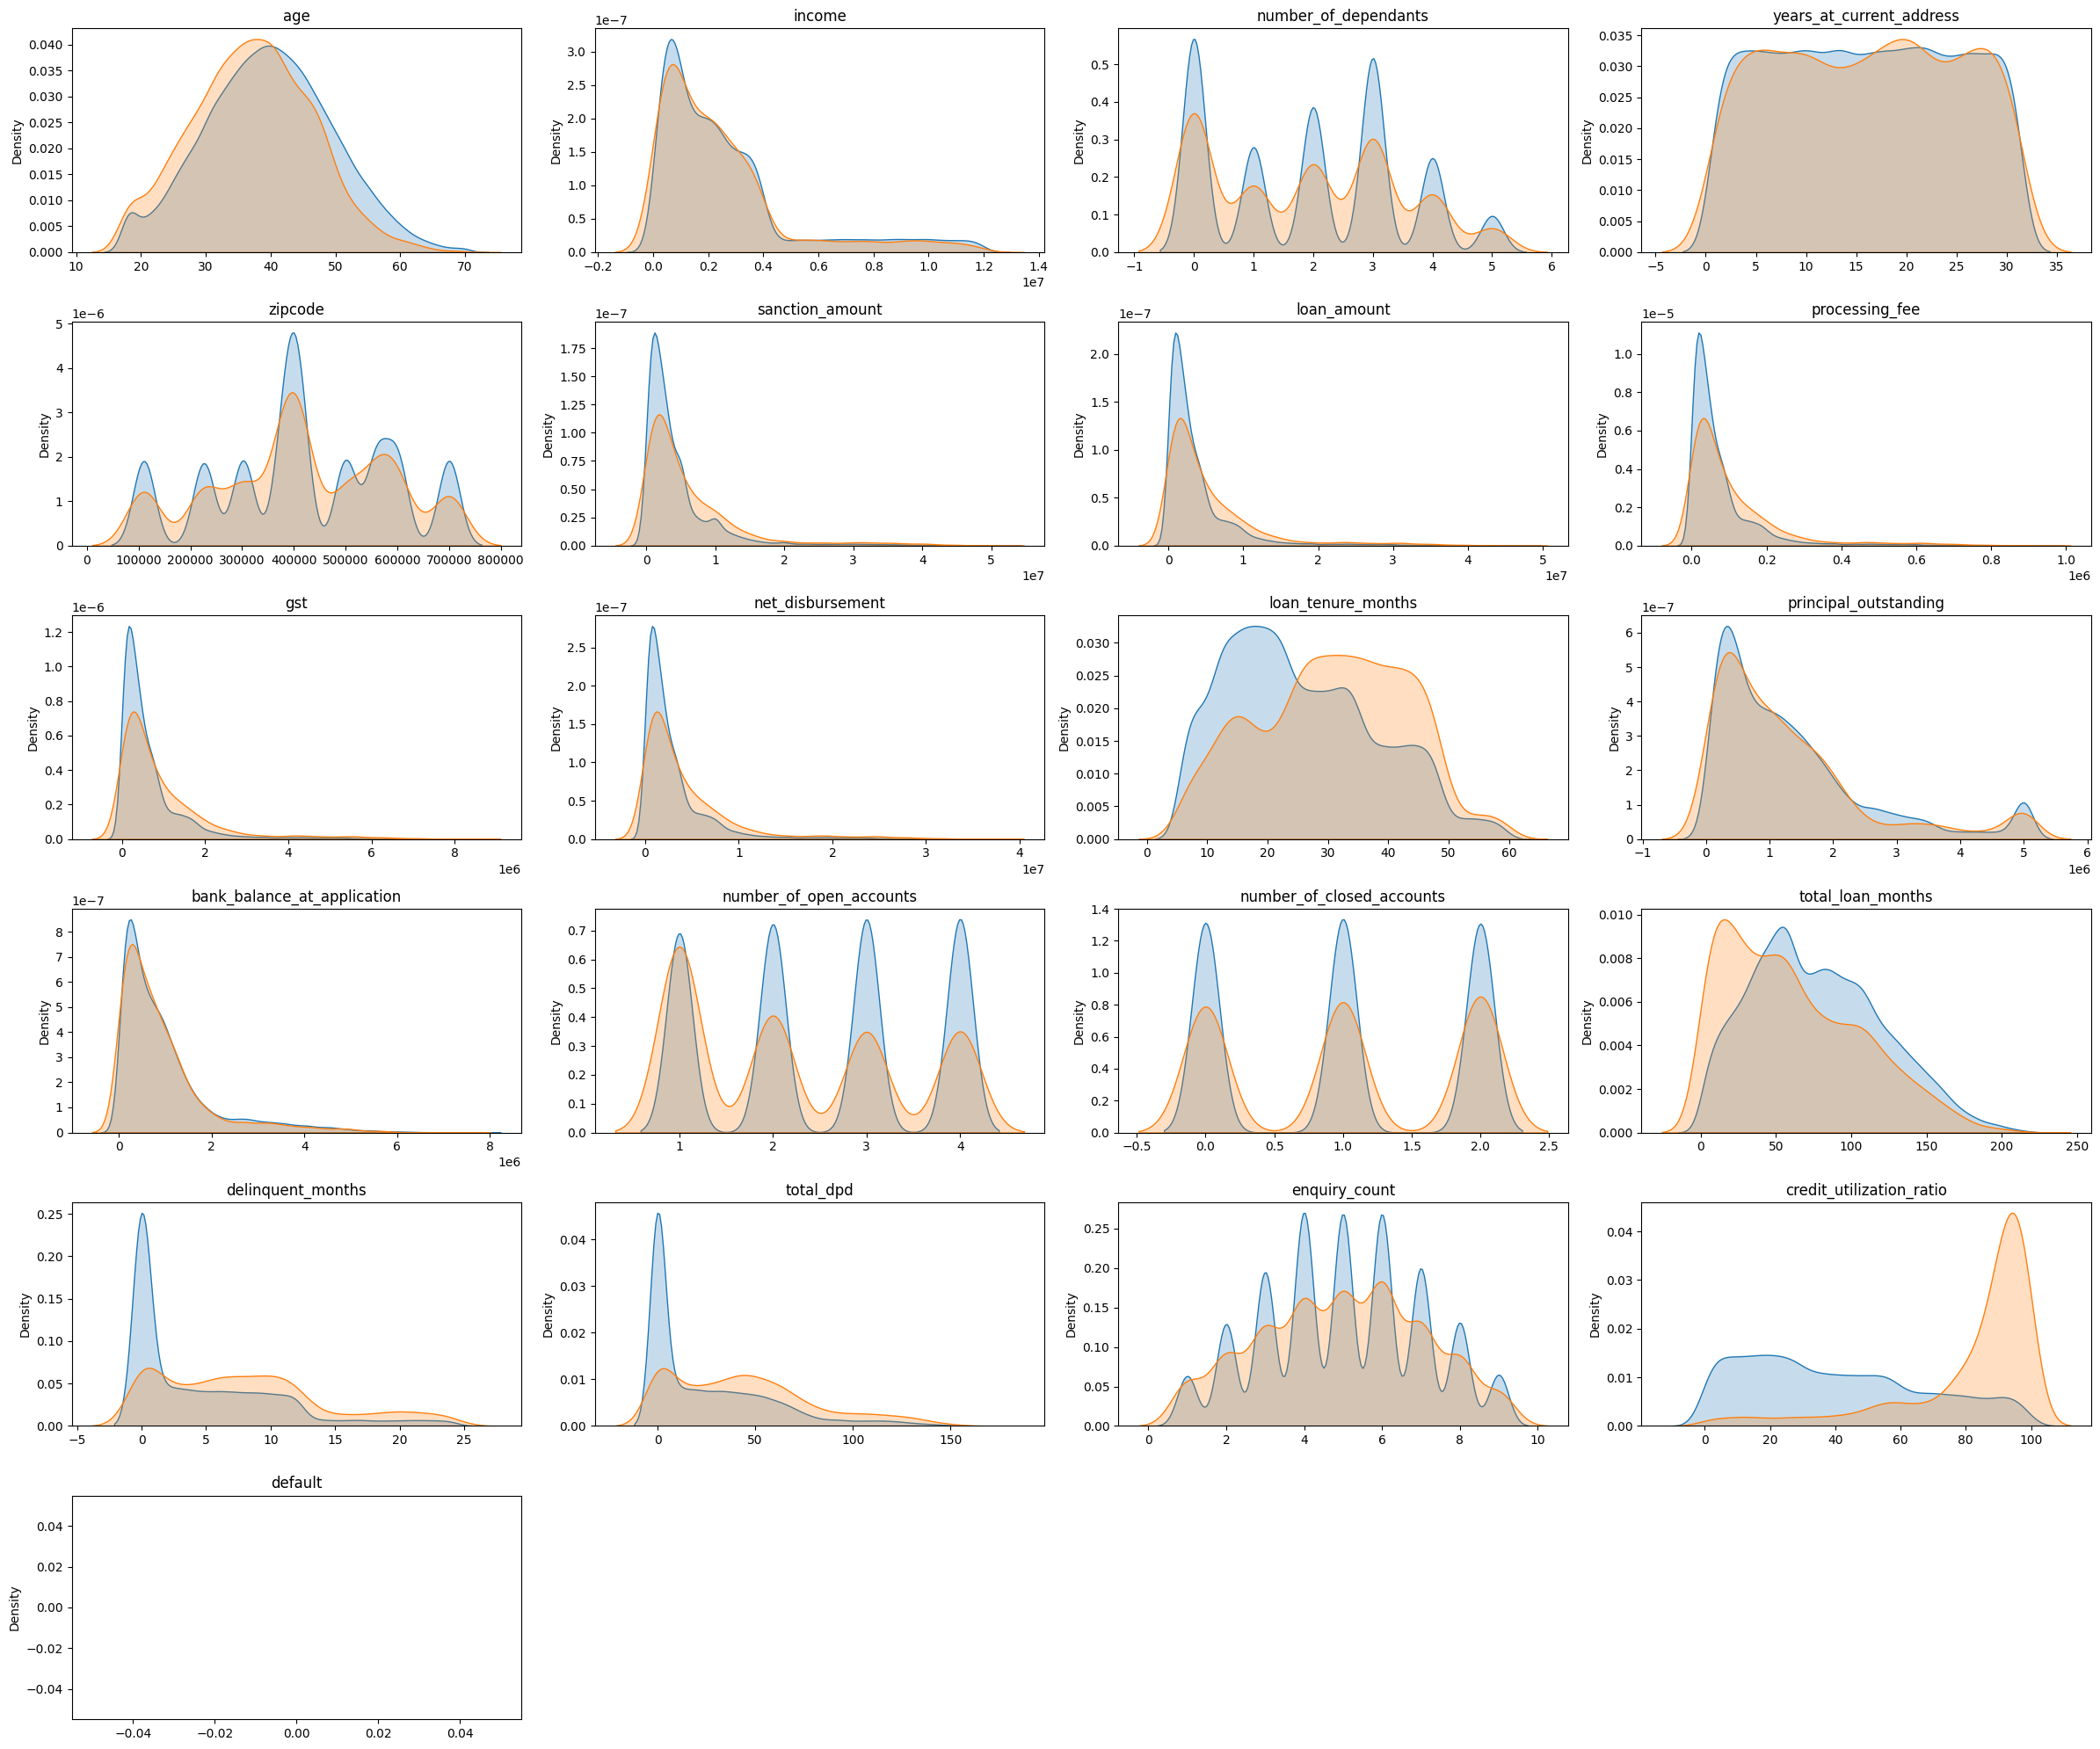

In [40]:
#KDE for all continuous column
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train[col][df_train['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train[col][df_train['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Insights**

* In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
* In remaining columns the distributions do not give any obvious insights
* Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable.

### **Feature Engineering, Feature Selection**
**According to Business**

1. Loan to Income ratio is a better metric compared to loan amount and income as individual features.
2. Delinquent months to loan months ratio is a better metric ompared to Delinquent months and loan months as individual features.
3. Average DPD (days past due) per delinquent month is a better metric.

#### **Feature selection in continuous columns**
#### **Generate Loan to Income (LTI) Ratio**

In [41]:
df_train[["loan_amount", "income"]].head(3)

loan_amount    income
12746     23442000  11327000
32495      1149000    715000
43675     11296000   3195000

In [42]:
df_train['loan_to_income'] = round(df_train['loan_amount'] / df_train['income'],2)
df_train['loan_to_income'].describe()

count   37493.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [43]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

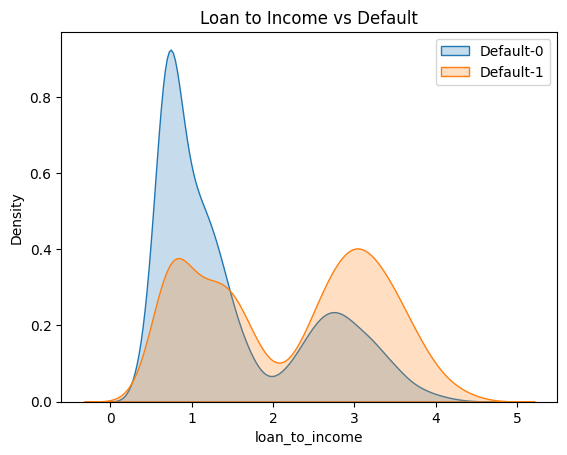

In [44]:
#KDE plot for loan_to_income vs default=0 and default=1
sns.kdeplot(data=df_train[df_train["default"]==0], x="loan_to_income", fill=True, label="Default-0")
sns.kdeplot(data=df_train[df_train["default"]==1], x="loan_to_income", fill=True, label="Default-1")
plt.title("Loan to Income vs Default")
plt.legend()
plt.show()

**Insights**

1. Blue graph has majority of its values on lower side of LTI.
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

Higher the Loan to Income ratio, the more likely the peron is to default.

In [45]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
default                        0
loan_to_income                 7
dtype: int64

It seems that while both loan_amount and income columns do not have any null values individually, dividing these columns could still produce NaN (null) values if there are zeros in the income column. This would result in division by zero, which would produce NaN in the loan_to_income column.

In [46]:
# check if any zero values exist in the income column
df_train[df_train['income'] == 0]

cust_id  age gender marital_status employment_status  income  \
45224  C45225   43      M        Married          Salaried       0   
2278   C02279   46      M        Married     Self-Employed       0   
11092  C11093   39      F         Single          Salaried       0   
46640  C46641   28      F        Married          Salaried       0   
47428  C47429   27      M         Single     Self-Employed       0   
13356  C13357   34      F         Single     Self-Employed       0   
27457  C27458   48      F        Married     Self-Employed       0   

       number_of_dependants residence_type  years_at_current_address     city  \
45224                     4       Mortgage                        30  Chennai   
2278                      2         Rented                        26     Pune   
11092                     0         Rented                        17  Chennai   
46640                     4         Rented                        24   Jaipur   
47428                     0          Owned                        19  Lucknow   
13356                     1          Owned                         2    Delhi   
27457                     3          Owned                         5     Pune   

       ... installment_start_dt  number_of_open_accounts  \
45224  ...           2024-02-27                        3   
2278   ...           2019-11-03                        4   
11092  ...           2020-09-08                        2   
46640  ...           2024-04-08                        2   
47428  ...           2024-05-13                        4   
13356  ...           2020-12-21                        2   
27457  ...           2022-05-12                        4   

      number_of_closed_accounts total_loan_months delinquent_months  \
45224                         1               112                10   
2278                          2               129                 0   
11092                         1                67                 0   
46640                         0                73                 0   
47428                         0                99                15   
13356                         2                63                22   
27457                         1                72                 0   

       total_dpd  enquiry_count  credit_utilization_ratio  default  \
45224         53              7                        30        0   
2278           0              7                        15        0   
11092          0              5                        12        0   
46640          0              6                        30        0   
47428         87              4                        37        0   
13356        125              3                        28        0   
27457          0              7                        89        0   

       loan_to_income  
45224             NaN  
2278              NaN  
11092             NaN  
46640             NaN  
47428             NaN  
13356             NaN  
27457             NaN  

[7 rows x 34 columns]

In [47]:
#These null values can either be filled with median or 0
df_train['loan_to_income'].fillna(df_train['loan_to_income'].median(), inplace=True)
df_test['loan_to_income'].fillna(df_test['loan_to_income'].median(), inplace=True)

<ipython-input-47-0e1a6afb726d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['loan_to_income'].fillna(df_train['loan_to_income'].median(), inplace=True)
<ipython-input-47-0e1a6afb726d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

#### **Generate Delinquency Ratio**

In [48]:
df_train['delinquency_ratio'] = (df_train['delinquent_months']*100 / df_train['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

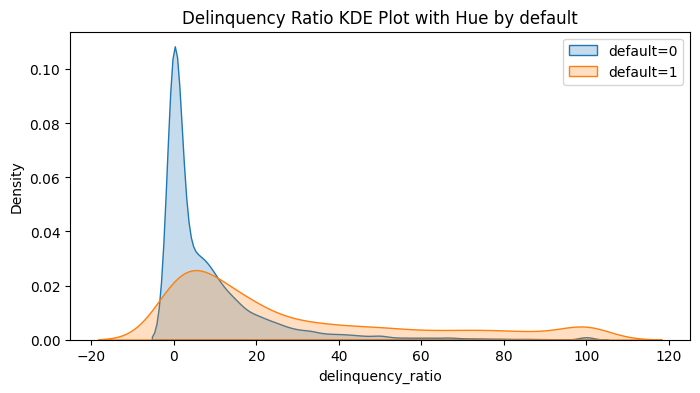

In [49]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train['delinquency_ratio'][df_train['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train['delinquency_ratio'][df_train['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

In [50]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
default                        0
loan_to_income                 0
delinquency_ratio              0
dtype: int64

#### **Generate Avg DPD Per Delinquency**

In [51]:
df_train['avg_dpd_per_delinquency'] = np.where(
    df_train['delinquent_months'] != 0,
    (df_train['total_dpd'] / df_train['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

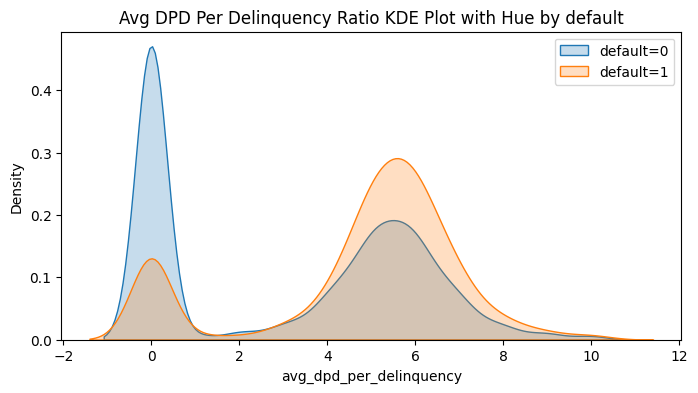

In [52]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train['avg_dpd_per_delinquency'][df_train['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train['avg_dpd_per_delinquency'][df_train['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

In [53]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
default                        0
loan_to_income                 0
delinquency_ratio              0
avg_dpd_per_delinquency        0
dtype: int64

#### **Generate Credit Utilization Per LTI**

In [54]:
df_train['credit_utilization_per_income'] = np.where(
    df_train['loan_to_income'] != 0,
    (df_train['credit_utilization_ratio'] / df_train['loan_to_income']).round(1),
    0
)

df_test['credit_utilization_per_income'] = np.where(
    df_test['loan_to_income'] != 0,
    (df_test['credit_utilization_ratio'] / df_test['loan_to_income']).round(1),
    0
)

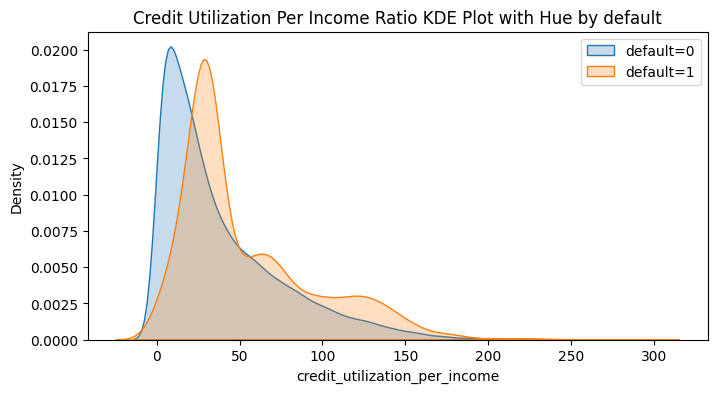

In [55]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train['credit_utilization_per_income'][df_train['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train['credit_utilization_per_income'][df_train['default'] == 1], fill=True, label='default=1')
plt.title(f"Credit Utilization Per Income Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

Graph clearly shows more occurrences of default cases when the Credit Utilization Per Income Ratio is high. This indicates that this column is a strong predictor of default risk.

In [56]:
# Remove columns that are just unique ids and don't have influence on target
df_train_2 = df_train.drop(["cust_id", "loan_id"], axis="columns")
df_test = df_test.drop(["cust_id", "loan_id"], axis="columns")

In [57]:
# Remove columns that business contact person asked us to remove
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [58]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

#### **VIF to measure multicolinearity**

In [59]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

age  number_of_dependants  years_at_current_address  zipcode  \
count 37500.00              37500.00                  37500.00 37500.00   
mean      0.41                  0.39                      0.50     0.52   
std       0.19                  0.31                      0.30     0.29   
min       0.00                  0.00                      0.00     0.00   
25%       0.29                  0.00                      0.23     0.33   
50%       0.40                  0.40                      0.50     0.49   
75%       0.54                  0.60                      0.77     0.76   
max       1.00                  1.00                      1.00     1.00   

       sanction_amount  processing_fee      gst  net_disbursement  \
count         37500.00        37500.00 37500.00          37500.00   
mean              0.09            0.08     0.08              0.08   
std               0.12            0.11     0.11              0.11   
min               0.00            0.00     0.00              0.00   
25%               0.02            0.02     0.02              0.02   
50%               0.05            0.05     0.05              0.05   
75%               0.10            0.10     0.10              0.10   
max               1.00            1.00     1.00              1.00   

       loan_tenure_months  principal_outstanding  bank_balance_at_application  \
count            37500.00               37500.00                     37500.00   
mean                 0.38                   0.27                         0.13   
std                  0.23                   0.24                         0.13   
min                  0.00                   0.00                         0.00   
25%                  0.19                   0.08                         0.04   
50%                  0.34                   0.20                         0.08   
75%                  0.55                   0.36                         0.16   
max                  1.00                   1.00                         1.00   

       number_of_open_accounts  number_of_closed_accounts  enquiry_count  \
count                 37500.00                   37500.00       37500.00   
mean                      0.50                       0.50           0.50   
std                       0.37                       0.41           0.25   
min                       0.00                       0.00           0.00   
25%                       0.00                       0.00           0.38   
50%                       0.67                       0.50           0.50   
75%                       1.00                       1.00           0.62   
max                       1.00                       1.00           1.00   

       credit_utilization_ratio  loan_to_income  delinquency_ratio  \
count                  37500.00        37500.00           37500.00   
mean                       0.44            0.29               0.10   
std                        0.30            0.23               0.17   
min                        0.00            0.00               0.00   
25%                        0.18            0.11               0.00   
50%                        0.39            0.20               0.04   
75%                        0.68            0.51               0.13   
max                        1.00            1.00               1.00   

       avg_dpd_per_delinquency  credit_utilization_per_income  
count                 37500.00                       37500.00  
mean                      0.33                           0.14  
std                       0.29                           0.13  
min                       0.00                           0.00  
25%                       0.00                           0.04  
50%                       0.43                           0.09  
75%                       0.57                           0.20  
max                       1.00                           1.00

In [60]:
# Same transformation on test set
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

age  number_of_dependants  years_at_current_address  zipcode  \
count 12500.00              12500.00                  12500.00 12500.00   
mean      0.42                  0.38                      0.50     0.53   
std       0.19                  0.31                      0.30     0.29   
min       0.00                  0.00                      0.00     0.00   
25%       0.29                  0.00                      0.23     0.33   
50%       0.42                  0.40                      0.50     0.51   
75%       0.54                  0.60                      0.77     0.76   
max       1.00                  1.00                      1.00     1.00   

       sanction_amount  processing_fee      gst  net_disbursement  \
count         12500.00        12500.00 12500.00          12500.00   
mean              0.09            0.08     0.08              0.08   
std               0.12            0.11     0.11              0.11   
min               0.00            0.00     0.00              0.00   
25%               0.02            0.02     0.02              0.02   
50%               0.05            0.05     0.05              0.05   
75%               0.10            0.10     0.10              0.10   
max               0.98            0.96     0.96              0.96   

       loan_tenure_months  principal_outstanding  bank_balance_at_application  \
count            12500.00               12500.00                     12500.00   
mean                 0.38                   0.27                         0.13   
std                  0.23                   0.24                         0.13   
min                  0.00                   0.00                         0.00   
25%                  0.19                   0.09                         0.04   
50%                  0.34                   0.20                         0.09   
75%                  0.55                   0.36                         0.16   
max                  1.00                   1.00                         0.94   

       number_of_open_accounts  number_of_closed_accounts  enquiry_count  \
count                 12500.00                   12500.00       12500.00   
mean                      0.50                       0.50           0.50   
std                       0.37                       0.41           0.25   
min                       0.00                       0.00           0.00   
25%                       0.00                       0.00           0.38   
50%                       0.33                       0.50           0.50   
75%                       0.67                       1.00           0.62   
max                       1.00                       1.00           1.00   

       credit_utilization_ratio  loan_to_income  delinquency_ratio  \
count                  12500.00        12500.00           12500.00   
mean                       0.44            0.29               0.11   
std                        0.30            0.23               0.17   
min                        0.00            0.00               0.00   
25%                        0.18            0.11               0.00   
50%                        0.39            0.20               0.04   
75%                        0.68            0.50               0.13   
max                        1.00            1.00               1.00   

       avg_dpd_per_delinquency  credit_utilization_per_income  
count                 12500.00                       12500.00  
mean                      0.33                           0.14  
std                       0.29                           0.13  
min                       0.00                           0.00  
25%                       0.00                           0.04  
50%                       0.44                           0.09  
75%                       0.58                           0.20  
max                       1.00                           0.96

In [61]:
#Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [62]:
X_train.head()

age gender marital_status employment_status  number_of_dependants  \
12746 0.79      M        Married     Self-Employed                  0.60   
32495 0.50      F         Single          Salaried                  0.00   
43675 0.38      M         Single          Salaried                  0.00   
9040  0.46      M        Married          Salaried                  0.40   
13077 0.77      M        Married     Self-Employed                  0.80   

      residence_type  years_at_current_address       city        state  \
12746          Owned                      0.97  Hyderabad    Telangana   
32495          Owned                      0.87     Mumbai  Maharashtra   
43675       Mortgage                      0.83    Chennai   Tamil Nadu   
9040        Mortgage                      0.97  Bangalore    Karnataka   
13077          Owned                      0.93       Pune  Maharashtra   

       zipcode  ... principal_outstanding bank_balance_at_application  \
12746     0.66  ...                  1.00                        0.61   
32495     0.49  ...                  0.09                        0.03   
43675     0.83  ...                  0.33                        0.18   
9040      0.76  ...                  0.20                        0.08   
13077     0.51  ...                  0.13                        0.07   

       number_of_open_accounts  number_of_closed_accounts  enquiry_count  \
12746                     1.00                       1.00           0.38   
32495                     0.67                       0.50           0.50   
43675                     0.00                       0.50           0.38   
9040                      0.67                       0.00           0.88   
13077                     0.00                       1.00           0.00   

       credit_utilization_ratio  loan_to_income  delinquency_ratio  \
12746                      0.36            0.41               0.13   
32495                      0.05            0.31               0.06   
43675                      0.00            0.76               0.22   
9040                       0.88            0.19               0.00   
13077                      0.72            0.05               0.00   

       avg_dpd_per_delinquency  credit_utilization_per_income  
12746                     0.59                           0.06  
32495                     0.62                           0.01  
43675                     0.56                           0.00  
9040                      0.00                           0.26  
13077                     0.00                           0.49  

[5 rows x 27 columns]

In [63]:
calculate_vif(X_train[cols_to_scale])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables       VIF
0                             age      5.94
1            number_of_dependants      2.73
2        years_at_current_address      3.45
3                         zipcode      3.83
4                 sanction_amount    102.27
5                  processing_fee 232538.22
6                             gst       inf
7                net_disbursement       inf
8              loan_tenure_months      6.35
9           principal_outstanding     17.13
10    bank_balance_at_application     10.35
11        number_of_open_accounts      4.39
12      number_of_closed_accounts      2.39
13                  enquiry_count      6.44
14       credit_utilization_ratio     10.44
15                 loan_to_income      8.35
16              delinquency_ratio      1.94
17        avg_dpd_per_delinquency      2.91
18  credit_utilization_per_income      9.15

In [64]:
#Drop the columns with VIF > 11
features_to_drop = calculate_vif(X_train[cols_to_scale])[calculate_vif(X_train[cols_to_scale])['VIF'] > 11]['variables']
features_to_drop

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


4          sanction_amount
5           processing_fee
6                      gst
7         net_disbursement
9    principal_outstanding
Name: variables, dtype: object

In [65]:
X_train_1 = X_train.drop(features_to_drop, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

In [66]:
vif_df = calculate_vif(X_train_1[numeric_columns])

In [67]:
vif_df

variables   VIF
0                             age  5.61
1            number_of_dependants  2.73
2        years_at_current_address  3.43
3                         zipcode  3.81
4              loan_tenure_months  6.21
5     bank_balance_at_application  1.92
6         number_of_open_accounts  4.36
7       number_of_closed_accounts  2.38
8                   enquiry_count  6.42
9        credit_utilization_ratio 10.13
10                 loan_to_income  6.19
11              delinquency_ratio  1.94
12        avg_dpd_per_delinquency  2.91
13  credit_utilization_per_income  8.70

In [68]:
selected_numeric_features_vif = vif_df.variables.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'], dtype=object)

In [69]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

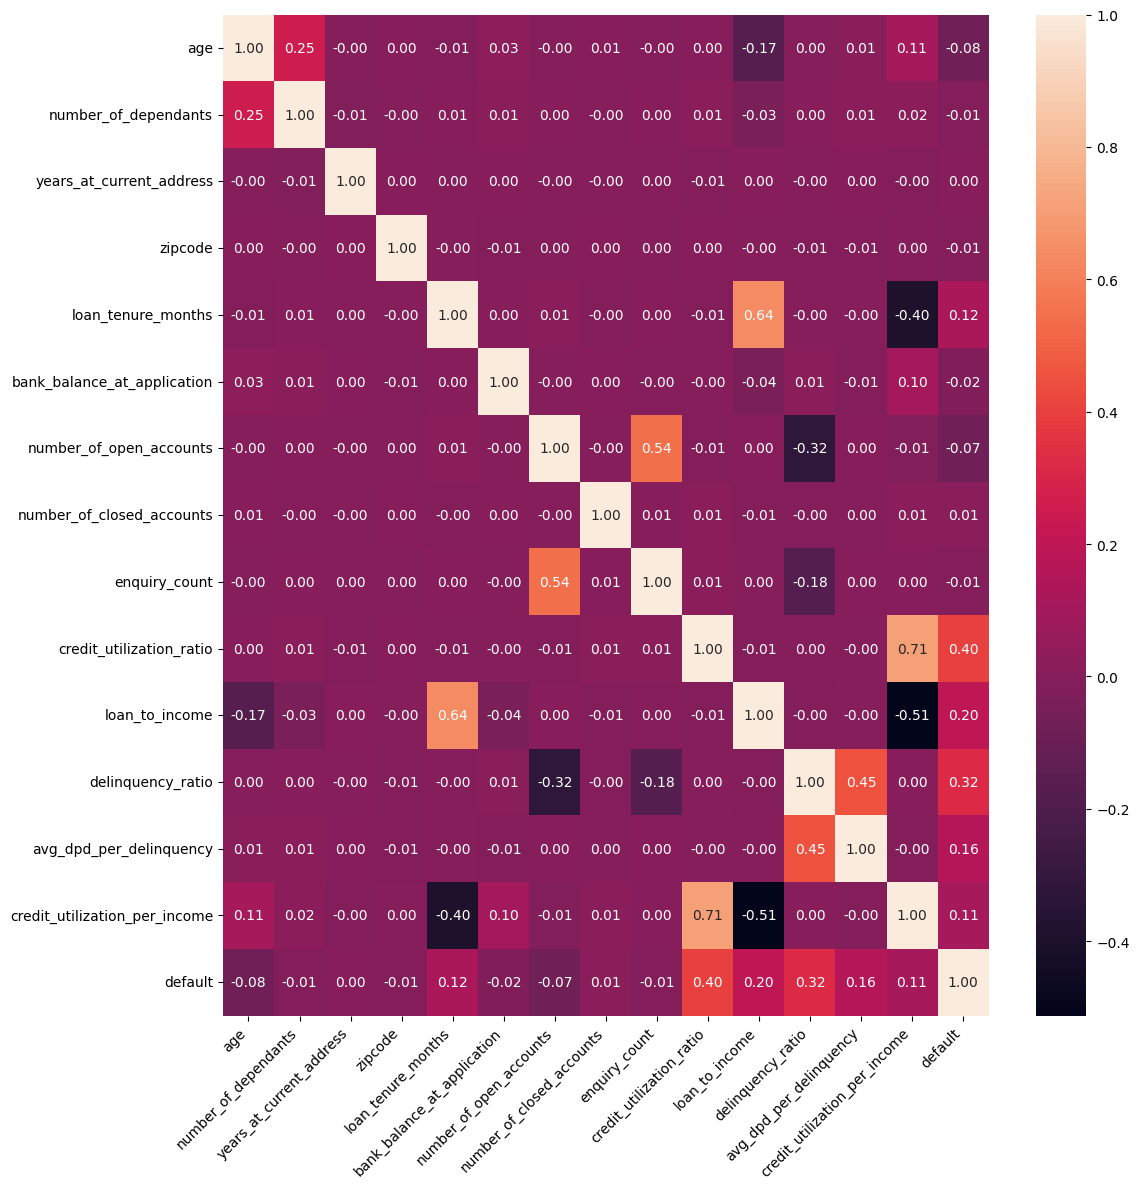

In [70]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Feature selection in categorical columns**
Weight of Evidence (WoE) and Information Value (IV) are popular feature engineering techniques used primarily in risk modeling, particularly for credit risk scorecards. They help assess the predictive power of categorical (and continuous) features in binary classification problems, like default vs. non-default in credit scoring.


* WoE is a measure of the predictive power of a feature with respect to a binary outcome. It helps to understand the relationship between a feature and the likelihood of an event (such as a default).

* IV measures the overall predictive power of a feature. It sums up the contributions of each group (bin) in the feature to the overall predictiveness.

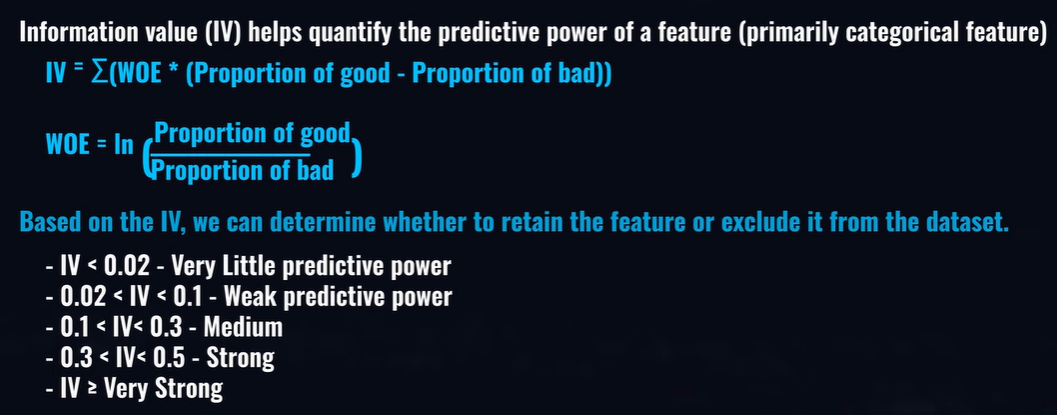

In the context of Weight of Evidence (WoE), the "good" proportion refers to non-defaults, and the "bad" proportion refers to defaults.

**Good proportion (non-default)**: This is the proportion of loans that did not default (non-default loans) in a specific category relative to the total number of non-default loans across all categories.

**Bad proportion (default)**: This is the proportion of loans that defaulted in a specific category relative to the total number of default loans across all categories.
The formula for WoE is:


So, in WoE calculations:

The "good" category refers to non-default (loans that are repaid).

The "bad" category refers to default (loans that were not repaid).

In [71]:
# Calculate WoE and IV
def calculate_woe_iv(dataset, feature, target):
    # Group by feature and aggregate the target (default in this case)
    grouped = dataset.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'bad'})  # 'bad' are defaulters (default = 1)

    grouped['good'] = grouped['total'] - grouped['bad']  # 'good' are non-defaulters (default = 0)

    total_good = grouped['good'].sum()  # Total non-defaulters (good)
    total_bad = grouped['bad'].sum()    # Total defaulters (bad)

    # Proportions
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad

    # Calculate WoE and IV
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct']) * grouped['woe']

    # Replace infinite values with 0
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    # Calculate total IV (Information Value)
    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), 'loan_purpose', 'default')
grouped


total   bad   good  good_pct  bad_pct   woe   iv
loan_purpose                                                  
Auto           7450   327   7123      0.21     0.10  0.72 0.08
Education      5622   559   5063      0.15     0.17 -0.16 0.00
Home          11306  1734   9572      0.28     0.54 -0.66 0.17
Personal      13122   603  12519      0.37     0.19  0.67 0.12

In [72]:
total_iv

0.3692189341739988

In [73]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 12746 to 37784
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37500 non-null  float64
 1   gender                         37500 non-null  object 
 2   marital_status                 37500 non-null  object 
 3   employment_status              37500 non-null  object 
 4   number_of_dependants           37500 non-null  float64
 5   residence_type                 37500 non-null  object 
 6   years_at_current_address       37500 non-null  float64
 7   city                           37500 non-null  object 
 8   state                          37500 non-null  object 
 9   zipcode                        37500 non-null  float64
 10  loan_purpose                   37500 non-null  object 
 11  loan_type                      37500 non-null  object 
 12  loan_tenure_months             37500 non-null  

In [74]:
#Calculate IV for all the columns
iv_values = {}

for feature in X_train_1.columns:
  # IV values for categorical variables
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
  #IV values for continuous variables
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False) #Converting continuous to categorical variable using bins
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv

iv_values

{'age': 0.08906812258818872,
 'gender': 0.0004713302002865393,
 'marital_status': 0.0011312958842861925,
 'employment_status': 0.003962817686215643,
 'number_of_dependants': 0.0019319222997829138,
 'residence_type': 0.24650546685395572,
 'years_at_current_address': 0.002081615248162928,
 'city': 0.0019028470036161064,
 'state': 0.0018980454270216681,
 'zipcode': 0.0016666893713206433,
 'loan_purpose': 0.3692189341739988,
 'loan_type': 0.16322359443776294,
 'loan_tenure_months': 0.2190353021247993,
 'bank_balance_at_application': 0.006385385452325605,
 'number_of_open_accounts': 0.08473296891695808,
 'number_of_closed_accounts': 0.001196316422000571,
 'enquiry_count': 0.00787788453856117,
 'credit_utilization_ratio': 2.352915652565081,
 'loan_to_income': 0.4765236957288652,
 'delinquency_ratio': 0.7166548747855236,
 'avg_dpd_per_delinquency': 0.40142654495047614,
 'credit_utilization_per_income': 0.19560249077207492}

* **For categorical variables (object)**: It directly applies the calculate_woe_iv function to calculate WoE and IV without modification.
* **For continuous variables**: It bins the continuous features into 10 equal-width bins using pd.cut. Binning transforms a continuous feature into a discrete one by grouping its values into intervals. After binning, it applies the WoE calculation on the binned data.

Binning changes the distribution of the continuous variables and groups values into categories. This approach can give different WoE/IV results depending on how the bins are defined.

In [75]:
# #Calculate IV for all the columns both categorical and continuous
# iv_values = {}

# for col in X_train_1.columns:
#     if X_train_1[col].dtype == 'object':
#         grouped, iv = calculate_woe_iv(pd.concat([X_train_1[col], y_train], axis=1), col, 'default')
#         iv_values[col] = iv
#     else:
#         grouped, iv = calculate_woe_iv(pd.concat([X_train_1[col], y_train], axis=1), col, 'default')
#         iv_values[col] = iv

# iv_values

* **For both categorical and continuous variables**: It applies calculate_woe_iv directly without any binning or modification for continuous features.

Since no binning is applied, the WoE/IV calculation directly uses the continuous values. This will typically yield different results because continuous features can have many unique values, leading to different proportions compared to the binned approach.

###**Why Different Outputs?**

#### **1. Binning (First Code Block):**

* **Effect of binning**: When you bin continuous variables, you reduce the number of distinct values, and this changes the proportion of defaults (good_pct, bad_pct) within each bin. As a result, the WoE and IV values will reflect the behavior within these bins, not the original continuous values.
* **Simplifies the model**: Binning can simplify the analysis, but it can also lead to information loss because you are grouping the values.

#### **2. No Binning (Second Code Block):**
* **Direct use of continuous values**: The second approach calculates WoE/IV directly on the continuous values, without grouping them. This gives a more granular and precise WoE calculation for each unique value of the feature, but can lead to a higher variance in the WoE values due to many unique data points.
* **Greater sensitivity**: Without binning, the IV values may capture more variability in the data because continuous features aren't grouped into larger categories.

#### **Which Approach is Better?**
* **Binning** (First approach) is commonly used when working with continuous variables to prevent overfitting and to simplify the WoE calculation by reducing the number of unique values.
* **No binning** (Second approach) might capture more detailed relationships in the data but can be more sensitive to small variations, especially when there are many unique values.

**Suggestion**:

* If you want to use IV for feature selection, the first approach (with binning) is usually preferred because it makes the calculation more stable.
* If you want to use WoE/IV directly in the model, you should experiment with both approaches and see which yields better predictive power.

I am using first approach to prevent overfitting and to simplify the WoE calculation.

In [76]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

Feature    IV
17       credit_utilization_ratio 2.353
19              delinquency_ratio 0.717
18                 loan_to_income 0.477
20        avg_dpd_per_delinquency 0.401
10                   loan_purpose 0.369
5                  residence_type 0.247
12             loan_tenure_months 0.219
21  credit_utilization_per_income 0.196
11                      loan_type 0.163
0                             age 0.089
14        number_of_open_accounts 0.085
16                  enquiry_count 0.008
13    bank_balance_at_application 0.006
3               employment_status 0.004
6        years_at_current_address 0.002
4            number_of_dependants 0.002
7                            city 0.002
8                           state 0.002
9                         zipcode 0.002
15      number_of_closed_accounts 0.001
2                  marital_status 0.001
1                          gender 0.000

In [77]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency',
 'credit_utilization_per_income']

#### **Feature Encoding**

In [78]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [79]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

age  loan_tenure_months  number_of_open_accounts  \
12746 0.788               0.415                    1.000   
32495 0.500               0.830                    0.667   
43675 0.385               0.491                    0.000   

       credit_utilization_ratio  loan_to_income  delinquency_ratio  \
12746                     0.364           0.415              0.132   
32495                     0.051           0.307              0.062   
43675                     0.000           0.759              0.222   

       avg_dpd_per_delinquency  credit_utilization_per_income  \
12746                    0.590                          0.060   
32495                    0.620                          0.011   
43675                    0.560                          0.000   

       residence_type_Owned  residence_type_Rented  loan_purpose_Education  \
12746                  True                  False                   False   
32495                  True                  False                    True   
43675                 False                  False                   False   

       loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured  
12746               True                  False                False  
32495              False                  False                False  
43675               True                  False                False

In [80]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

age  loan_tenure_months  number_of_open_accounts  \
19205 0.346               0.755                    0.333   
15514 0.481               0.226                    1.000   
30367 0.231               0.547                    0.667   

       credit_utilization_ratio  loan_to_income  delinquency_ratio  \
19205                     0.990           0.550              0.000   
15514                     0.323           0.220              0.000   
30367                     0.828           0.180              0.000   

       avg_dpd_per_delinquency  credit_utilization_per_income  \
19205                    0.000                          0.127   
15514                    0.000                          0.089   
30367                    0.000                          0.263   

       residence_type_Owned  residence_type_Rented  loan_purpose_Education  \
19205                  True                  False                   False   
15514                  True                  False                    True   
30367                  True                  False                   False   

       loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured  
19205               True                  False                False  
15514              False                  False                False  
30367              False                  False                False

### **Model Training**

### Attempt 1

1. Logistic Regression, RandomForest & XGB
2. No handling of class imbalance

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11426
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12500
   macro avg       0.91      0.86      0.88     12500
weighted avg       0.96      0.96      0.96     12500



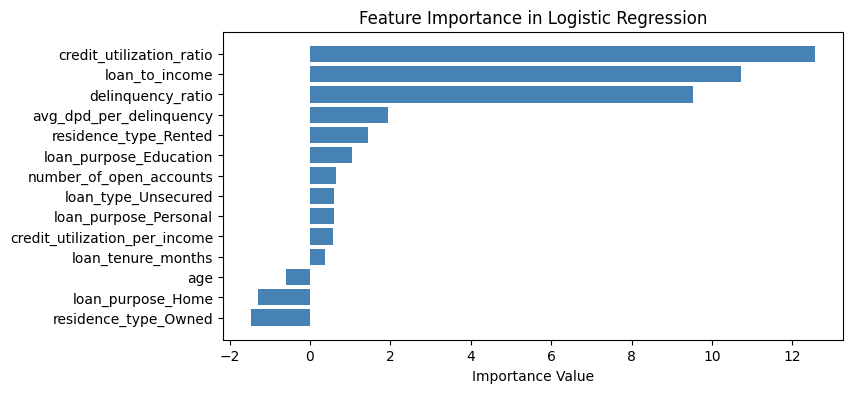

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11426
           1       0.84      0.70      0.77      1074

    accuracy                           0.96     12500
   macro avg       0.91      0.85      0.87     12500
weighted avg       0.96      0.96      0.96     12500



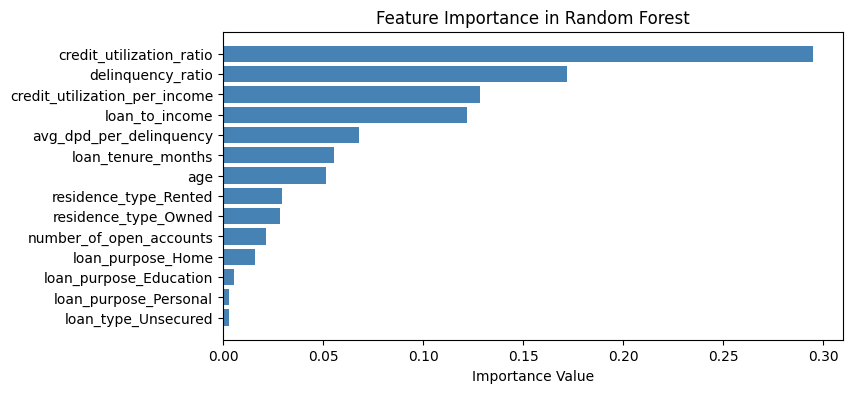

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11426
           1       0.81      0.76      0.79      1074

    accuracy                           0.96     12500
   macro avg       0.90      0.87      0.88     12500
weighted avg       0.96      0.96      0.96     12500



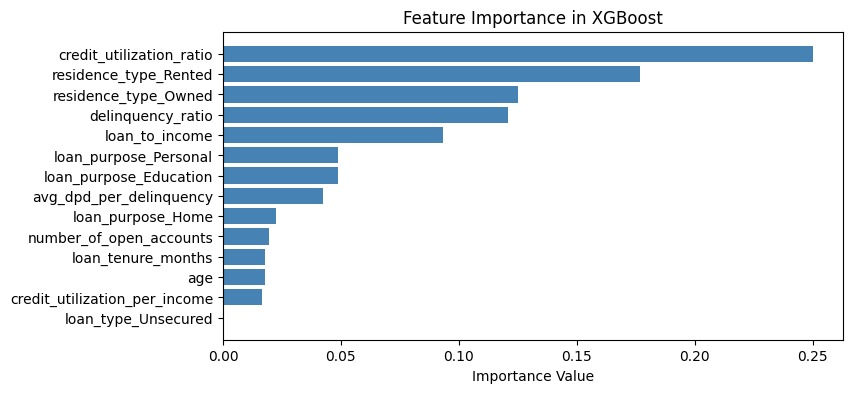

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Function to train model, predict, display classification report and feature importance
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name='Model'):
    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)

    # Plot feature importance based on model type
    if hasattr(model, 'coef_'):  # For Logistic Regression
        feature_importance = model.coef_[0]
        plot_feature_importance(X_train, feature_importance, model_name)

    elif hasattr(model, 'feature_importances_'):  # For RandomForest, XGBoost
        feature_importance = model.feature_importances_
        plot_feature_importance(X_train, feature_importance, model_name)

# Function to plot feature importance
def plot_feature_importance(X_train, feature_importance, model_name):
    # Create DataFrame for feature importance
    coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Importance'])

    # Sort coefficients for better visualization
    coef_df = coef_df.sort_values(by='Importance', ascending=True)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.barh(coef_df.index, coef_df['Importance'], color='steelblue')
    plt.xlabel('Importance Value')
    plt.title(f'Feature Importance in {model_name}')
    plt.show()

# Train and evaluate with Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
train_and_evaluate(logistic_model, X_train_encoded, y_train, X_test_encoded, y_test, model_name='Logistic Regression')

# Train and evaluate with RandomForest
rf_model = RandomForestClassifier()
train_and_evaluate(rf_model, X_train_encoded, y_train, X_test_encoded, y_test, model_name='Random Forest')

# Train and evaluate with XGBoost
xgb_model = XGBClassifier()
train_and_evaluate(xgb_model, X_train_encoded, y_train, X_test_encoded, y_test, model_name='XGBoost')


Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression and XGB

In [82]:
from sklearn.model_selection import RandomizedSearchCV

# Function to perform RandomizedSearchCV for any model
def perform_random_search(model, param_dist, X_train, y_train, X_test, y_test, model_name='Model', n_iter=100):
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='f1',
        cv=3,  # 3-fold cross-validation
        verbose=2,
        random_state=42,
        n_jobs=-1  # Use all available cores
    )

    # Fit the RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Print best parameters and score
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Score for {model_name}: {random_search.best_score_}")

    # Make predictions on the test set with the best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    return best_model

# XGBoost parameters
xgb_param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

# Logistic Regression parameters
log_reg_param_dist = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']
}

# XGBoost model
xgb_model = XGBClassifier()

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=10000)

# Perform RandomizedSearchCV for XGBoost
best_xgb_model = perform_random_search(xgb_model, xgb_param_dist, X_train_encoded, y_train, X_test_encoded, y_test, model_name='XGBoost')

# Perform RandomizedSearchCV for Logistic Regression
best_log_reg_model = perform_random_search(log_reg_model, log_reg_param_dist, X_train_encoded, y_train, X_test_encoded, y_test, model_name='Logistic Regression')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for XGBoost: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score for XGBoost: 0.7880788930117312
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11426
           1       0.76      0.83      0.79      1074

    accuracy                           0.96     12500
   macro avg       0.87      0.90      0.89     12500
weighted avg       0.96      0.96      0.96     12500

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Logistic Regression: {'solver': 'saga', 'C': 29.763514416313132}
Best Score for Logistic Regression: 0.7583056897837065
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11426
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12500
   macro avg       0.90      0.86      0.88     12500
weighted avg       0.96      0.96      0.96     12500



### Attempt 2

1. Logistic Regression & XGB
2. Handle Class Imbalance Using Under Sampling

In [83]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11426
           1       0.51      0.96      0.66      1074

    accuracy                           0.92     12500
   macro avg       0.75      0.94      0.81     12500
weighted avg       0.95      0.92      0.93     12500



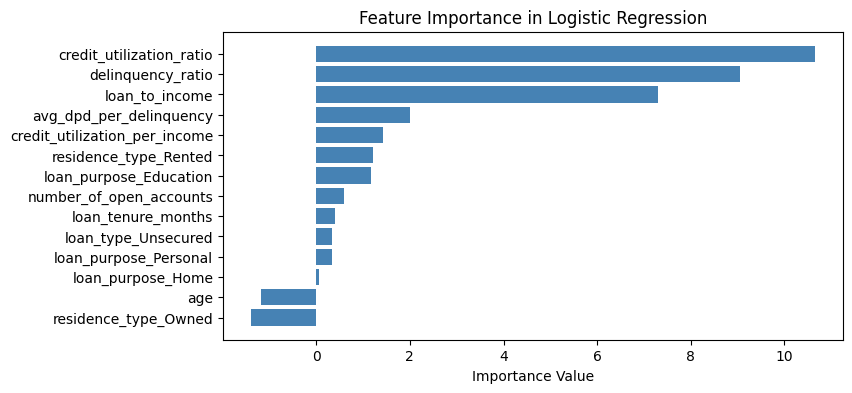

In [84]:
logistic_model = LogisticRegression(max_iter=1000)
train_and_evaluate(logistic_model, X_train_res, y_train_res, X_test_encoded, y_test, model_name='Logistic Regression')

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11426
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12500
   macro avg       0.75      0.95      0.81     12500
weighted avg       0.96      0.92      0.93     12500



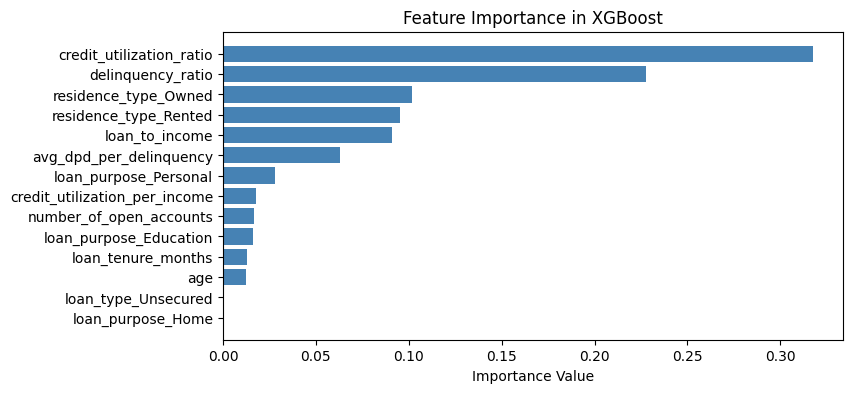

In [85]:
# best parameters obtained from RandomizedSearchCV
best_params_xgb = {
    'subsample': 0.8,
    'scale_pos_weight': 2,
    'reg_lambda': 1.0,
    'reg_alpha': 5.0,
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.2,
    'colsample_bytree': 0.9
}

xgb_model = XGBClassifier(**best_params_xgb)
train_and_evaluate(xgb_model, X_train_res, y_train_res, X_test_encoded, y_test, model_name='XGBoost')

### Attempt 3

1. Logistic Regression
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tunning using optuna

In [86]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34221
1    34221
Name: count, dtype: int64

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11426
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12500
   macro avg       0.78      0.94      0.83     12500
weighted avg       0.96      0.93      0.94     12500



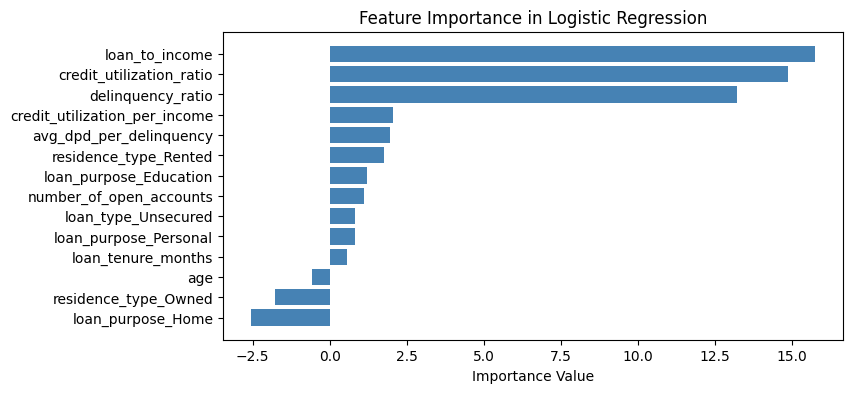

In [87]:
log_model = LogisticRegression()
train_and_evaluate(log_model, X_train_smt, y_train_smt, X_test_encoded, y_test, model_name='Logistic Regression')

In [88]:
!pip install optuna

In [89]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [90]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2024-10-25 17:33:09,924] A new study created in memory with name: no-name-26d7a1d0-5587-4b79-b9cf-40c055c2d9a5
[I 2024-10-25 17:33:11,046] Trial 0 finished with value: 0.9463044581984051 and parameters: {'C': 2742.04993151718, 'solver': 'liblinear', 'tol': 0.00024364671462594374, 'class_weight': None}. Best is trial 0 with value: 0.9463044581984051.
[I 2024-10-25 17:33:11,395] Trial 1 finished with value: 0.890008291832963 and parameters: {'C': 0.0016734418353200789, 'solver': 'liblinear', 'tol': 0.08329975446309042, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9463044581984051.
[I 2024-10-25 17:33:11,650] Trial 2 finished with value: 0.7709877639950392 and parameters: {'C': 0.028693282609529455, 'solver': 'lbfgs', 'tol': 0.06557974475387189, 'class_weight': None}. Best is trial 0 with value: 0.9463044581984051.
[I 2024-10-25 17:33:12,552] Trial 3 finished with value: 0.9451407164383432 and parameters: {'C': 0.9271287394147171, 'solver': 'liblinear', 'tol': 0.024427209

In [91]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9464162892356048
  Params: 
    C: 32.143713356472524
    solver: saga
    tol: 0.06277862812989658
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11426
           1       0.55      0.95      0.70      1074

    accuracy                           0.93     12500
   macro avg       0.77      0.94      0.83     12500
weighted avg       0.96      0.93      0.94     12500



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tuning using optuna

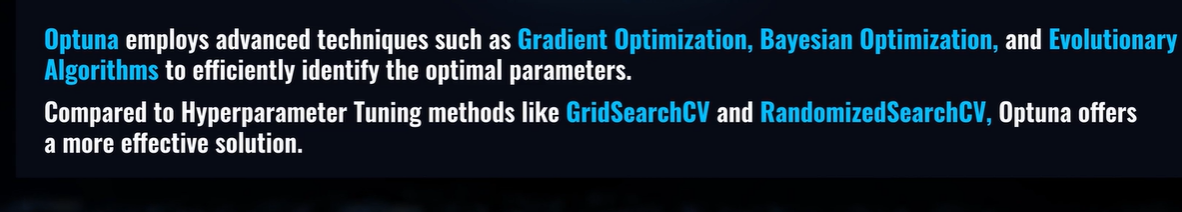

In [92]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2024-10-25 17:34:25,949] A new study created in memory with name: no-name-5a4535ec-15dc-40fb-a4af-b94e3e955203
[I 2024-10-25 17:34:28,590] Trial 0 finished with value: 0.9652379364852579 and parameters: {'lambda': 0.004550121980473256, 'alpha': 0.14300938482371017, 'subsample': 0.9822291276812951, 'colsample_bytree': 0.4635851970973773, 'max_depth': 7, 'eta': 0.26253624358827843, 'gamma': 5.045368404119252, 'scale_pos_weight': 5.8241352382319755, 'min_child_weight': 7, 'max_delta_step': 5}. Best is trial 0 with value: 0.9652379364852579.
[I 2024-10-25 17:34:31,665] Trial 1 finished with value: 0.961261349626203 and parameters: {'lambda': 8.636569687532498, 'alpha': 0.03952872681732011, 'subsample': 0.9848057813195341, 'colsample_bytree': 0.4896256809869336, 'max_depth': 6, 'eta': 0.2849118501250459, 'gamma': 5.393779045275885, 'scale_pos_weight': 6.804571774575605, 'min_child_weight': 9, 'max_delta_step': 5}. Best is trial 0 with value: 0.9652379364852579.
[I 2024-10-25 17:34:37,487

In [93]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9747296961129804
  Params: 
    lambda: 0.050953335056266646
    alpha: 0.0013103057523546255
    subsample: 0.9137985022480994
    colsample_bytree: 0.8973893574519741
    max_depth: 10
    eta: 0.25267412282365237
    gamma: 0.5640331896204023
    scale_pos_weight: 3.879992537303325
    min_child_weight: 7
    max_delta_step: 5
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11426
           1       0.69      0.87      0.77      1074

    accuracy                           0.96     12500
   macro avg       0.84      0.92      0.87     12500
weighted avg       0.96      0.96      0.96     12500



Here recall is more important because I want to catch as many default = 1 as possible (out of all default = 1, how many did the model correctly identify). Logistic model has better recall than XGboost.

**Precision** answers the question: “Out of all the items my model identified as positive (like ‘spam’), how many were actually positive?”

**Recall** answers the question: “Out of all the actual positive items (like all the spam emails), how many did my model correctly identify?”

### **Model Evaluation : ROC/AUC**

In [94]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11426
           1       0.55      0.95      0.70      1074

    accuracy                           0.93     12500
   macro avg       0.77      0.94      0.83     12500
weighted avg       0.96      0.93      0.94     12500



In [95]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00008752, 0.00008752]),
 array([0.        , 0.0009311 , 0.15921788, 0.15921788, 0.16759777]),
 array([       inf, 1.        , 0.99973335, 0.99972814, 0.99968255]))

0.9838425121443758


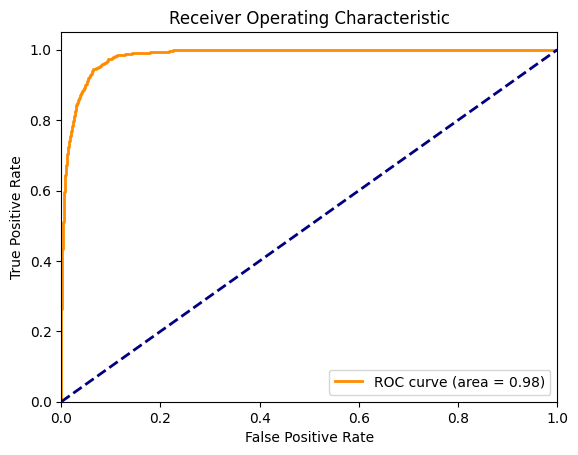

In [96]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
print(area)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Model Evaluation : Rankordering, KS statistic, Gini coeff**

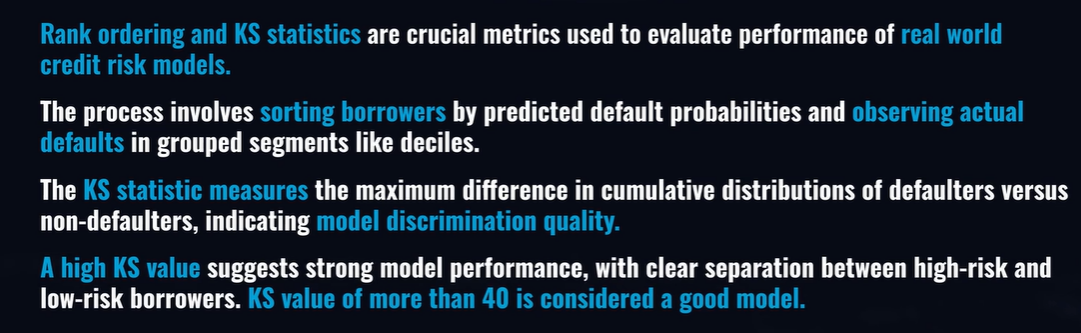

**1. KS (Kolmogorov-Smirnov) Statistic:**


* Measures the maximum distance between the cumulative distribution functions of defaults and non-defaults
* Ranges from 0 to 1, where higher values indicate better model discrimination
* The KS statistic is the maximum vertical distance between the curves of cumulative defaults and non-defaults
* Generally, a KS > 0.4 is considered good, > 0.5 is very good

**2. Gini Coefficient:**


Derived from the ROC curve and is equal to 2*AUC - 1
* Ranges from -1 to 1, where:

    * 1 indicates perfect prediction
    * 0 indicates random prediction
* Negative values indicate worse than random prediction


* Generally, a Gini > 0.6 is considered good for credit risk models



In [97]:
def perform_decile_analysis(y_true, probabilities):
    """
    Perform decile analysis on model predictions and calculate KS statistics

    Parameters:
    y_true: Array-like, true binary labels (0, 1)
    probabilities: Array-like, predicted probabilities from the model

    Returns:
    tuple: (decile_analysis DataFrame, summary_stats DataFrame)
    """
    # Create initial dataframe
    df_eval = pd.DataFrame({
        'Default Truth': y_true,
        'Default Probability': probabilities
    })

    # Calculate deciles
    df_eval['Decile'] = pd.qcut(df_eval['Default Probability'],
                               q=10,
                               labels=False,
                               duplicates='drop')

    # Calculate metrics by decile
    df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
        'Minimum Probability': x['Default Probability'].min(),
        'Maximum Probability': x['Default Probability'].max(),
        'Events': x['Default Truth'].sum(),
        'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
    }))

    # Reset index and sort in descending order
    df_decile = df_decile.reset_index()
    df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)

    # Calculate rates
    total_records = df_decile['Events'] + df_decile['Non-events']
    df_decile['Event Rate'] = df_decile['Events'] * 100 / total_records
    df_decile['Non-event Rate'] = df_decile['Non-events'] * 100 / total_records

    # Calculate cumulative metrics
    df_decile['Cum Events'] = df_decile['Events'].cumsum()
    df_decile['Cum Non-events'] = df_decile['Non-events'].cumsum()

    # Calculate cumulative rates
    total_events = df_decile['Events'].sum()
    total_non_events = df_decile['Non-events'].sum()
    df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / total_events
    df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events'] * 100 / total_non_events

    # Calculate KS statistic for each decile
    df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])

    # Create summary statistics
    summary_stats = pd.DataFrame({
        'Metric': [
            'Total Records',
            'Total Events (Defaults)',
            'Total Non-events (Non-defaults)',
            'Overall Event Rate',
            'Maximum KS Statistic',
            'Decile with Max KS',
            'Min Probability',
            'Max Probability',
            'Mean Probability'
        ],
        'Value': [
            len(y_true),
            total_events,
            total_non_events,
            f"{(total_events/len(y_true))*100:.2f}%",
            f"{df_decile['KS'].max():.2f}",
            df_decile.loc[df_decile['KS'].idxmax(), 'Decile'],
            f"{probabilities.min():.4f}",
            f"{probabilities.max():.4f}",
            f"{probabilities.mean():.4f}"
        ]
    })

    return df_decile, summary_stats

# Get predictions
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:, 1]

# Run the analysis
decile_analysis, summary_stats = perform_decile_analysis(y_test, probabilities)

# View decile analysis results
print("\nDecile Analysis Results:")
print(decile_analysis.to_string())

# View summary statistics
print("\nSummary Statistics:")
print(summary_stats.to_string(index=False))


Decile Analysis Results:
   Decile  Minimum Probability  Maximum Probability  Events  Non-events  Event Rate  Non-event Rate  Cum Events  Cum Non-events  Cum Event Rate  Cum Non-event Rate     KS
0       9                0.843                1.000 901.000     349.000      72.080          27.920     901.000         349.000          83.892               3.054 80.838
1       8                0.210                0.843 158.000    1092.000      12.640          87.360    1059.000        1441.000          98.603              12.612 85.992
2       7                0.023                0.210  13.000    1237.000       1.040          98.960    1072.000        2678.000          99.814              23.438 76.376
3       6                0.003                0.023   2.000    1248.000       0.160          99.840    1074.000        3926.000         100.000              34.360 65.640
4       5                0.000                0.003   0.000    1250.000       0.000         100.000    1074.000        

<ipython-input-97-919b392fedde>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


In [98]:
from IPython.display import display

# Get predictions
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:, 1]

# Run the analysis
decile_analysis, summary_stats = perform_decile_analysis(y_test, probabilities)

# For decile analysis DataFrame
print("\nDecile Analysis:")
display(decile_analysis.style.set_properties(**{'text-align': 'center'})
                     .set_table_styles([{'selector': 'th',
                                       'props': [('text-align', 'center')]}]))

# For summary statistics DataFrame
print("\nSummary Statistics:")
display(summary_stats.style.set_properties(**{'text-align': 'center'})
                      .set_table_styles([{'selector': 'th',
                                        'props': [('text-align', 'center')]}]))

<ipython-input-97-919b392fedde>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({



Decile Analysis:



Summary Statistics:


In [99]:
# Get maximum KS value and decile
max_ks = decile_analysis['KS'].max()
max_ks_decile = decile_analysis.loc[decile_analysis['KS'].idxmax(), 'Decile']

print(f"\nKey Metrics:")
print(f"Maximum KS Statistic: {max_ks:.2f}")
print(f"Decile with maximum KS: {max_ks_decile}")


Key Metrics:
Maximum KS Statistic: 85.99
Decile with maximum KS: 8


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [100]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9838425121443758
Gini Coefficient: 0.9676850242887516


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

## **Finalize The Model and Visualize Feature Importance**

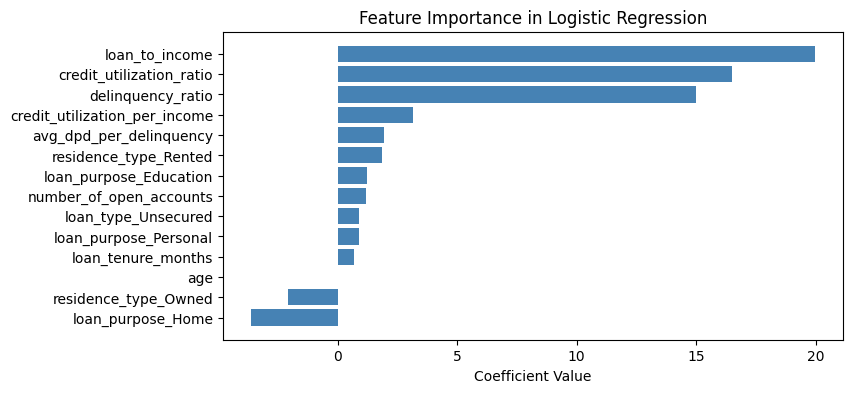

In [101]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [102]:
X_test_encoded.head(2)

age  loan_tenure_months  number_of_open_accounts  \
19205 0.346               0.755                    0.333   
15514 0.481               0.226                    1.000   

       credit_utilization_ratio  loan_to_income  delinquency_ratio  \
19205                     0.990           0.550              0.000   
15514                     0.323           0.220              0.000   

       avg_dpd_per_delinquency  credit_utilization_per_income  \
19205                    0.000                          0.127   
15514                    0.000                          0.089   

       residence_type_Owned  residence_type_Rented  loan_purpose_Education  \
19205                  True                  False                   False   
15514                  True                  False                    True   

       loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured  
19205               True                  False                False  
15514              False                  False                False

In [103]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [104]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

In [105]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [106]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'model_data.joblib')

['model_data.joblib']

In [107]:
final_model.coef_, final_model.intercept_

(array([[-0.00494039,  0.68831387,  1.17224116, 16.50712605, 19.96867697,
         14.97939265,  1.95286717,  3.1472674 , -2.10336075,  1.84196132,
          1.20361671, -3.62743395,  0.89815148,  0.89815148]]),
 array([-22.65020756]))

## Bayesian Search with logistic regression

In [108]:
!pip install bayesian-optimization scikit-learn

In [109]:
from bayes_opt import BayesianOptimization

In [110]:
# Define a function to optimize logistic regression
def optimize_log_reg(C, max_iter):
    model = LogisticRegression(C=C, max_iter=int(max_iter), solver='liblinear')
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='roc_auc')
    # We want to maximize the AUC-ROC score
    return scores.mean()

# Define the parameter space
param_bounds = {
    'C': (0.001, 10.0),
    'max_iter': (50, 500)
}

# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(
    f=optimize_log_reg,
    pbounds=param_bounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(init_points=10, n_iter=50)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
| 1         | 0.9827    | 3.746     | 477.8     |
| 2         | 0.9827    | 7.32      | 319.4     |
| 3         | 0.9826    | 1.561     | 120.2     |
| 4         | 0.982     | 0.5818    | 439.8     |
| 5         | 0.9827    | 6.012     | 368.6     |
| 6         | 0.9804    | 0.2068    | 486.5     |
| 7         | 0.9827    | 8.325     | 145.6     |
| 8         | 0.9826    | 1.819     | 132.5     |
| 9         | 0.9827    | 3.043     | 286.1     |
| 10        | 0.9827    | 4.32      | 181.1     |
| 11        | 0.9827    | 3.74      | 477.9     |
| 12        | 0.9827    | 9.222     | 138.3     |
| 13        | 0.9825    | 1.321     | 141.5     |
| 14        | 0.9827    | 7.636     | 311.5     |
| 15        | 0.9821    | 0.6855    | 314.8     |
| 16        | 0.9827    | 9.846     | 304.4     |
| 17        | 0.9827    | 6.641     | 296.4     |
| 18        | 0.9826    | 2.092     | 302.4     |


In [111]:
# Evaluate the final model on the test set
y_pred = final_model.predict(X_test_encoded)
y_prob = final_model.predict_proba(X_test_encoded)[:, 1]

In [112]:
# Print the classification report and AUC-ROC score
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11426
           1       0.55      0.95      0.70      1074

    accuracy                           0.93     12500
   macro avg       0.77      0.94      0.83     12500
weighted avg       0.96      0.93      0.94     12500



In [113]:
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

AUC-ROC Score: 0.9378990743122044


## XGBoost with grid search

In [114]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:47:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

In [115]:
# Extract the best parameters
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [116]:
# Train the final model with the best parameters
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_encoded)
y_prob = best_xgb_model.predict_proba(X_test_encoded)[:, 1]

In [117]:
# Evaluate the final model
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.988685105452265

In [118]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11426
           1       0.85      0.75      0.80      1074

    accuracy                           0.97     12500
   macro avg       0.91      0.87      0.89     12500
weighted avg       0.97      0.97      0.97     12500



## SHAP

SHAP, or SHapley Additive exPlanations, is a method for explaining the output of machine learning models

In [119]:
!pip install shap

In [120]:
import shap

In [121]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income',
       'residence_type_Owned', 'residence_type_Rented',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'loan_type_Unsecured'],
      dtype='object')

In [122]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_encoded)

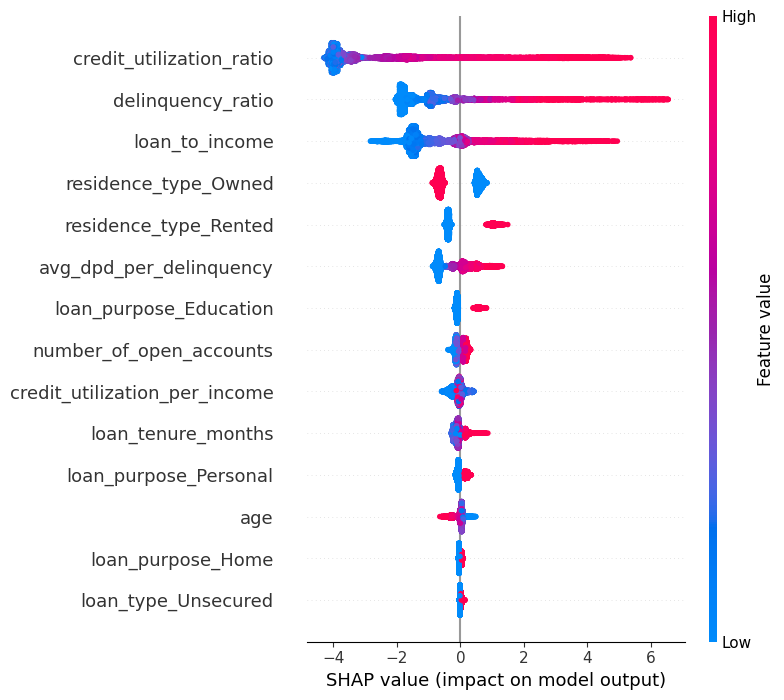

In [123]:
# Summary plot
shap.summary_plot(shap_values, X_test_encoded)

1. credit_utilization_ratio: High values (red) increase the likelihood of default, as shown by positive SHAP values.
2. delinquency_ratio: Similarly, higher values increase the risk, shown by positive SHAP values.
3. loan_to_income: Higher values (red) also increase the default risk.
4. residence_type_Owned and residence_type_Rented: Different impacts based on whether the residence is owned or rented.
5. avg_dpd_per_delinquency: Higher average days past due per delinquency increase the risk.

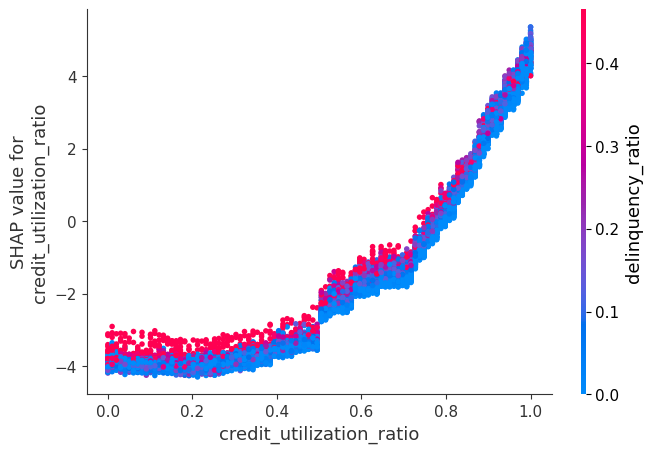

In [124]:
# Dependence plot for a specific feature
shap.dependence_plot("credit_utilization_ratio", shap_values, X_test_encoded)

In [125]:
# plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_encoded.iloc[0,:])

* The model's prediction for this instance is influenced positively by features like loan_tenure_months, loan_to_income, and credit_utilization_ratio, meaning these features increase the predicted value.
* On the other hand, features like delinquency_ratio and avg_dpd_per_delinquency push the prediction downwards.